In [1]:
import gym
import numpy as np
import matplotlib.pyplot as plt
import math
from tqdm import *

position_dims = 15
velocity_dims = 15
show_last_episodes = 1
initiate_with_zeros = False
epsilon = 0.02
min_eps = 0
episodes = 5000
RENDER_EVERY_EPISODE = 1000

class QLearner:
    def __init__(self, learning, discount, explore_function):
        self.env = gym.make('MountainCar-v0')
        self.env.reset()
        self.learning = learning
        self.discount = discount
        self.ranges = self.env.observation_space.high - self.env.observation_space.low
        self.os_disc_size = [position_dims, velocity_dims]
        self.discrete_os_window = (self.env.observation_space.high - self.env.observation_space.low)/self.os_disc_size
        self.seen_state = np.ones(self.os_disc_size + [self.env.action_space.n], dtype=np.int)
        self.explore_function = explore_function

        if initiate_with_zeros:
            self.Q = np.zeros((self.os_disc_size[0] + 1, self.os_disc_size[1] + 1, self.env.action_space.n))
        else:
            self.Q = np.random.uniform(low=-1, high=1,
                                       size=(self.os_disc_size[0] + 1, self.os_disc_size[1] + 1, self.env.action_space.n))

    def discretize_state(self, state):
        ds = (state - self.env.observation_space.low)/self.discrete_os_window
        return tuple(ds.astype(np.int))

    def get_action(self, disc_state, epsilon):
        if self.explore_function == "random":
            return self.env.action_space.sample() if np.random.random() < epsilon else np.argmax(self.Q[disc_state[0], disc_state[1]])
        else:
            return np.argmax(self.Q[disc_state] + 1/self.seen_state[disc_state])

    def update_q(self, disc_state, action, disc_new_state, reward):
        qp = np.max(self.Q[disc_new_state])
        q0 = self.Q[disc_state + (action,)]
        q1 = (1 - self.learning) * q0 + self.learning * (reward + self.discount * qp)
        self.Q[disc_state + (action,)] = q1

    def q_learning(self, epsilon, min_eps, episodes):
        
        ave_reward_list = []
        for ind in trange(episodes):
            disc_state = self.discretize_state(self.env.reset())
            done = False
            reward_list = []
            while not done:
                action = self.get_action(disc_state, max(min_eps, epsilon*(1-2*ind/episodes)))
                self.seen_state[disc_state + (action, )] += 1
                new_state, reward, done, _ = self.env.step(action)
                disc_new_state = self.discretize_state(new_state)
                if not done:
                    self.update_q(disc_state, action, disc_new_state, reward)
                    disc_state = disc_new_state
                    if episodes - ind <= show_last_episodes or ind % RENDER_EVERY_EPISODE == 0:
                        self.env.render()
                    reward_list.append(reward)
                elif new_state[0] >= self.env.goal_position:
                    self.Q[disc_state + (action,)] = 0
            ave_reward_list.append(sum(reward_list))
        self.env.close()
        return ave_reward_list

# learning, discount = 0.1, 0.99
# ql = QLearner(learning, discount, explore_function="random")
# rewards = ql.q_learning(epsilon, min_eps, episodes)
# plt.figure(figsize=(30, 30))
# plt.plot((np.arange(len(rewards)) + 1), rewards)
# plt.xlabel('Episodes')
# plt.ylabel('Average Reward')
# plt.title('Average Reward vs Episodes')
# plt.show()
# plt.savefig('rewards.png', dpi=100)
# plt.close()

random_final_alphas = []
nonrandom_final_alphas = []

# Random exploration function

## $\alpha$ = 0.01

100%|██████████| 5000/5000 [01:16<00:00, 65.06it/s] 


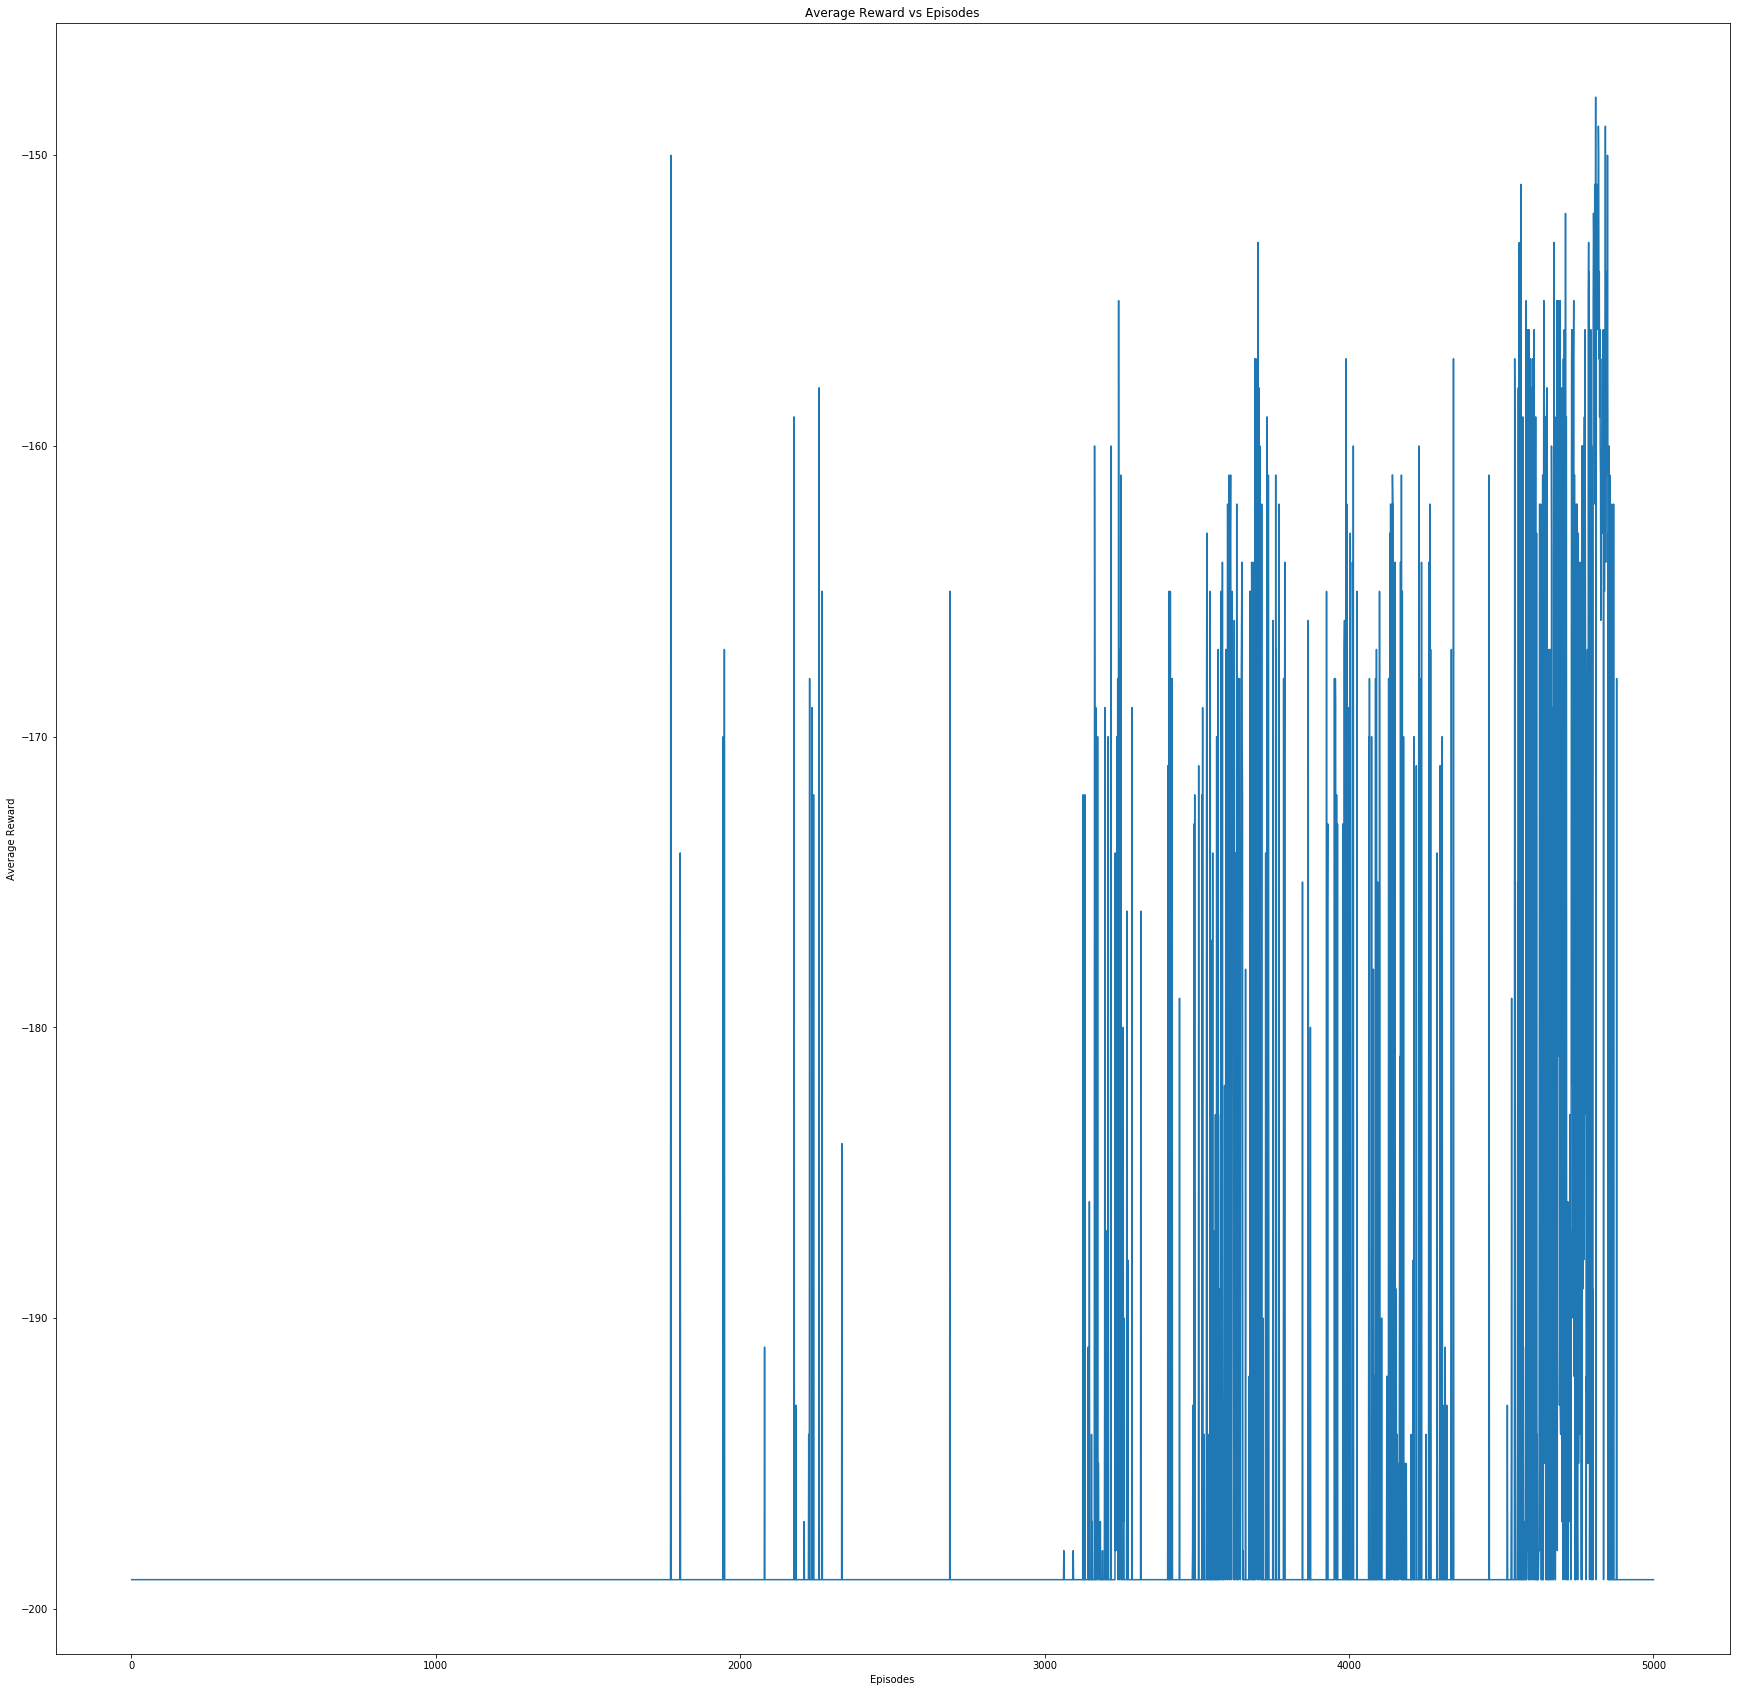

In [2]:
learning, discount = 0.01, 0.99
ql = QLearner(learning, discount, explore_function="random")
rewards = ql.q_learning(epsilon, min_eps, episodes)
plt.figure(figsize=(30, 30))
plt.plot((np.arange(len(rewards)) + 1), rewards)
plt.xlabel('Episodes')
plt.ylabel('Average Reward')
plt.title('Average Reward vs Episodes')
plt.show()
random_final_alphas.append(sum(rewards[-10:])/10)

# plt.savefig('rewards.png', dpi=100)
# plt.close()

## $\alpha$ = 0.1

100%|██████████| 5000/5000 [00:53<00:00, 94.11it/s] 


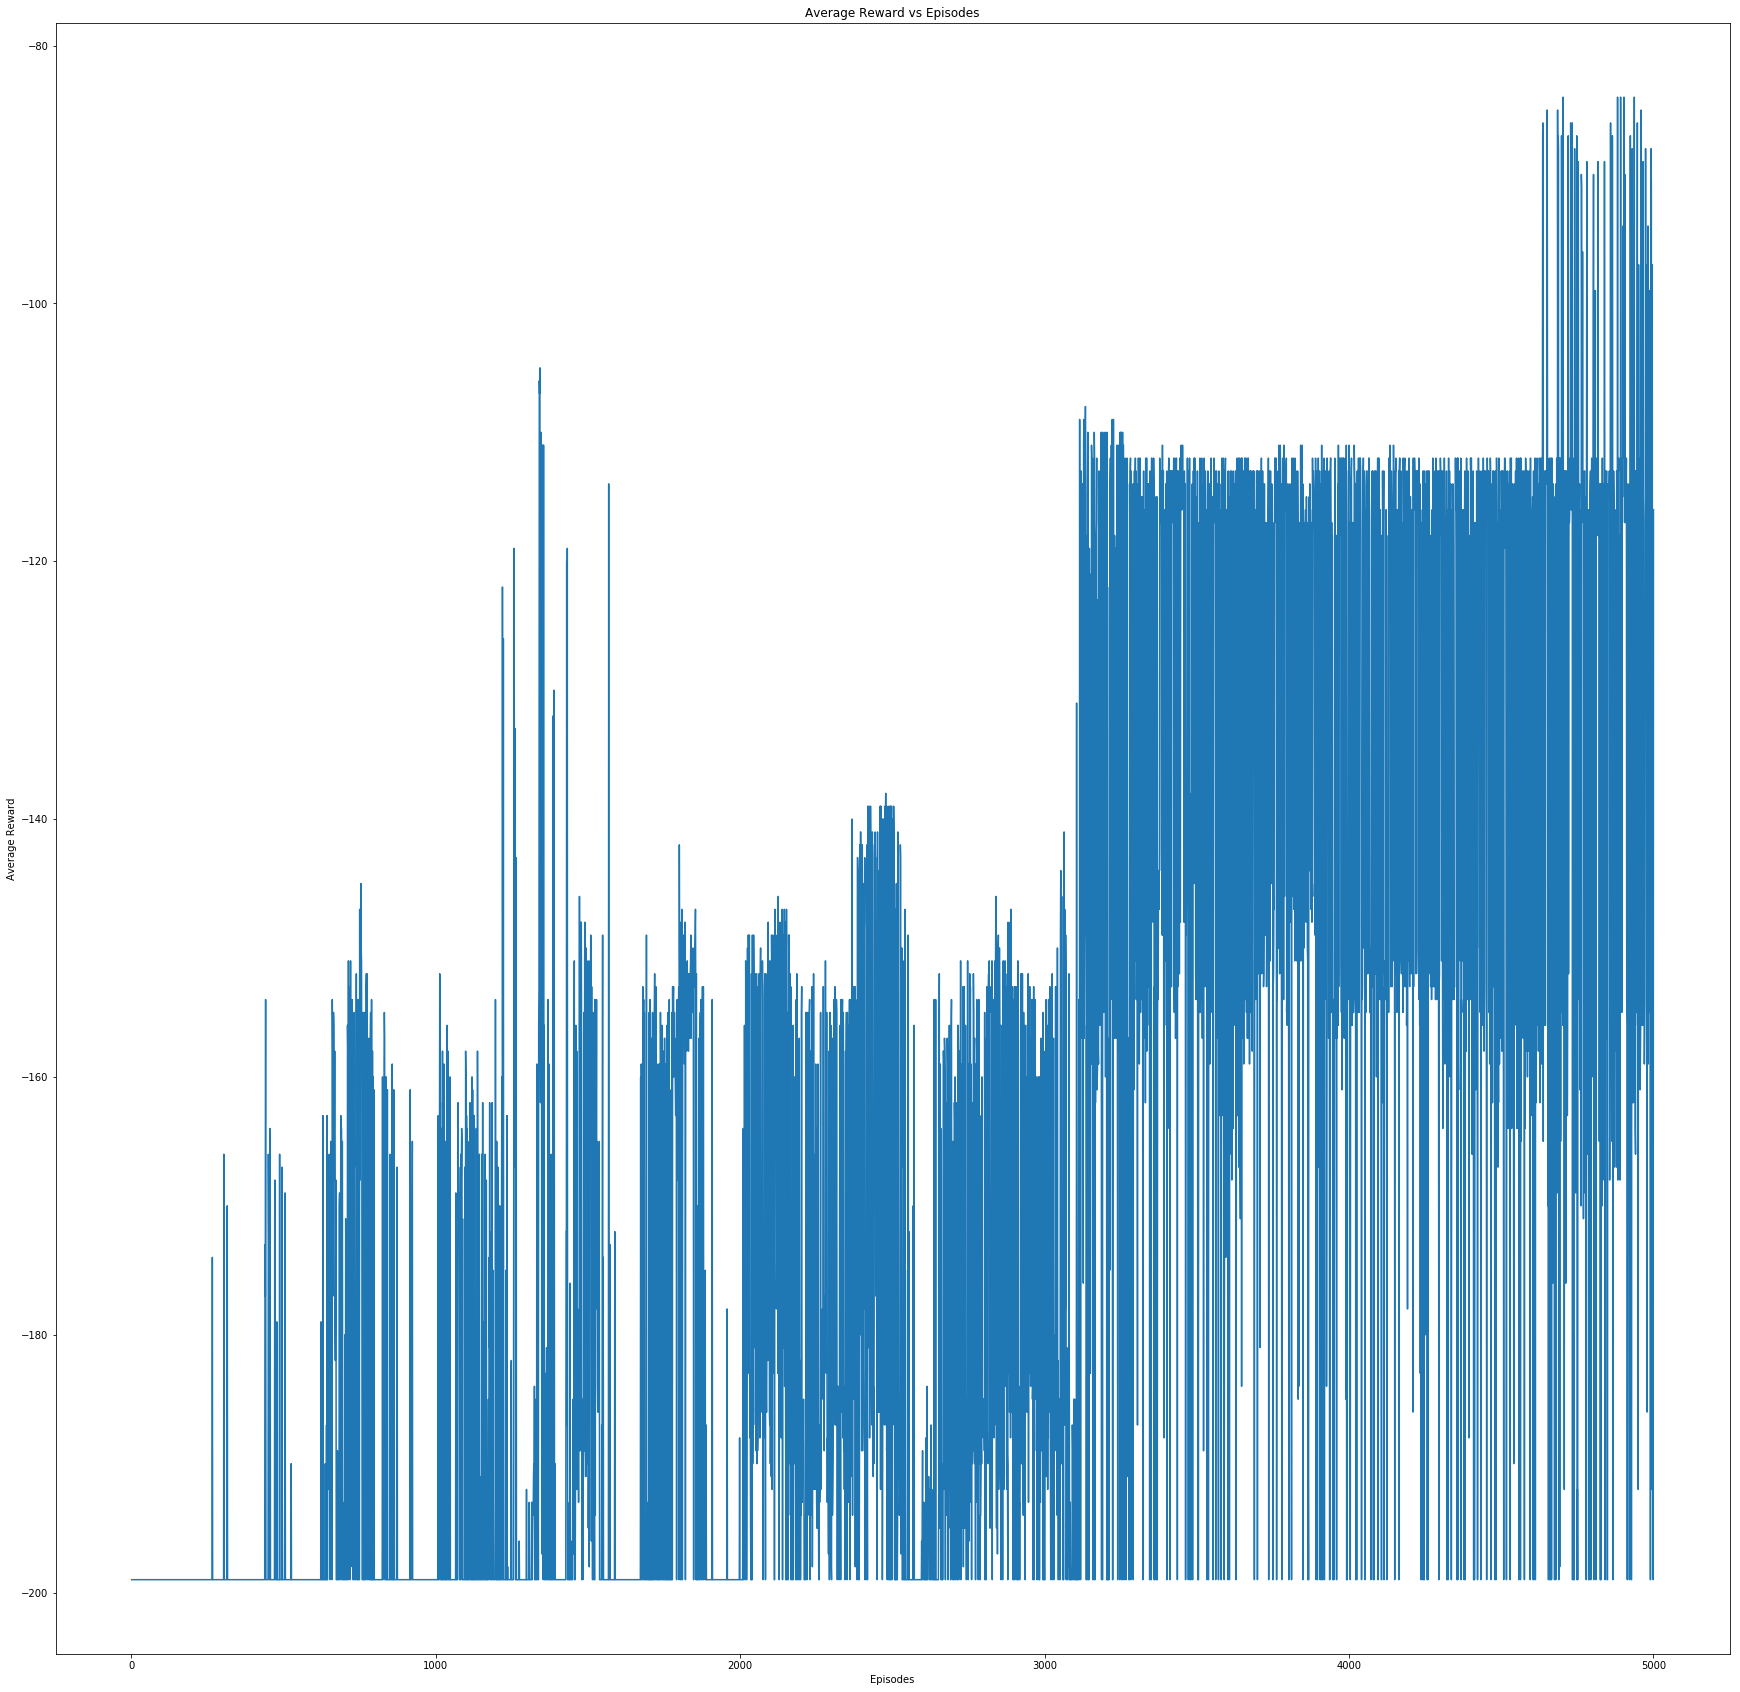

In [3]:
learning, discount = 0.1, 0.99
ql = QLearner(learning, discount, explore_function="random")
rewards = ql.q_learning(epsilon, min_eps, episodes)
plt.figure(figsize=(30, 30))
plt.plot((np.arange(len(rewards)) + 1), rewards)
plt.xlabel('Episodes')
plt.ylabel('Average Reward')
plt.title('Average Reward vs Episodes')
plt.show()
random_final_alphas.append(sum(rewards[-10:])/10)

## $\alpha$ = 0.4

100%|██████████| 5000/5000 [00:52<00:00, 95.85it/s] 


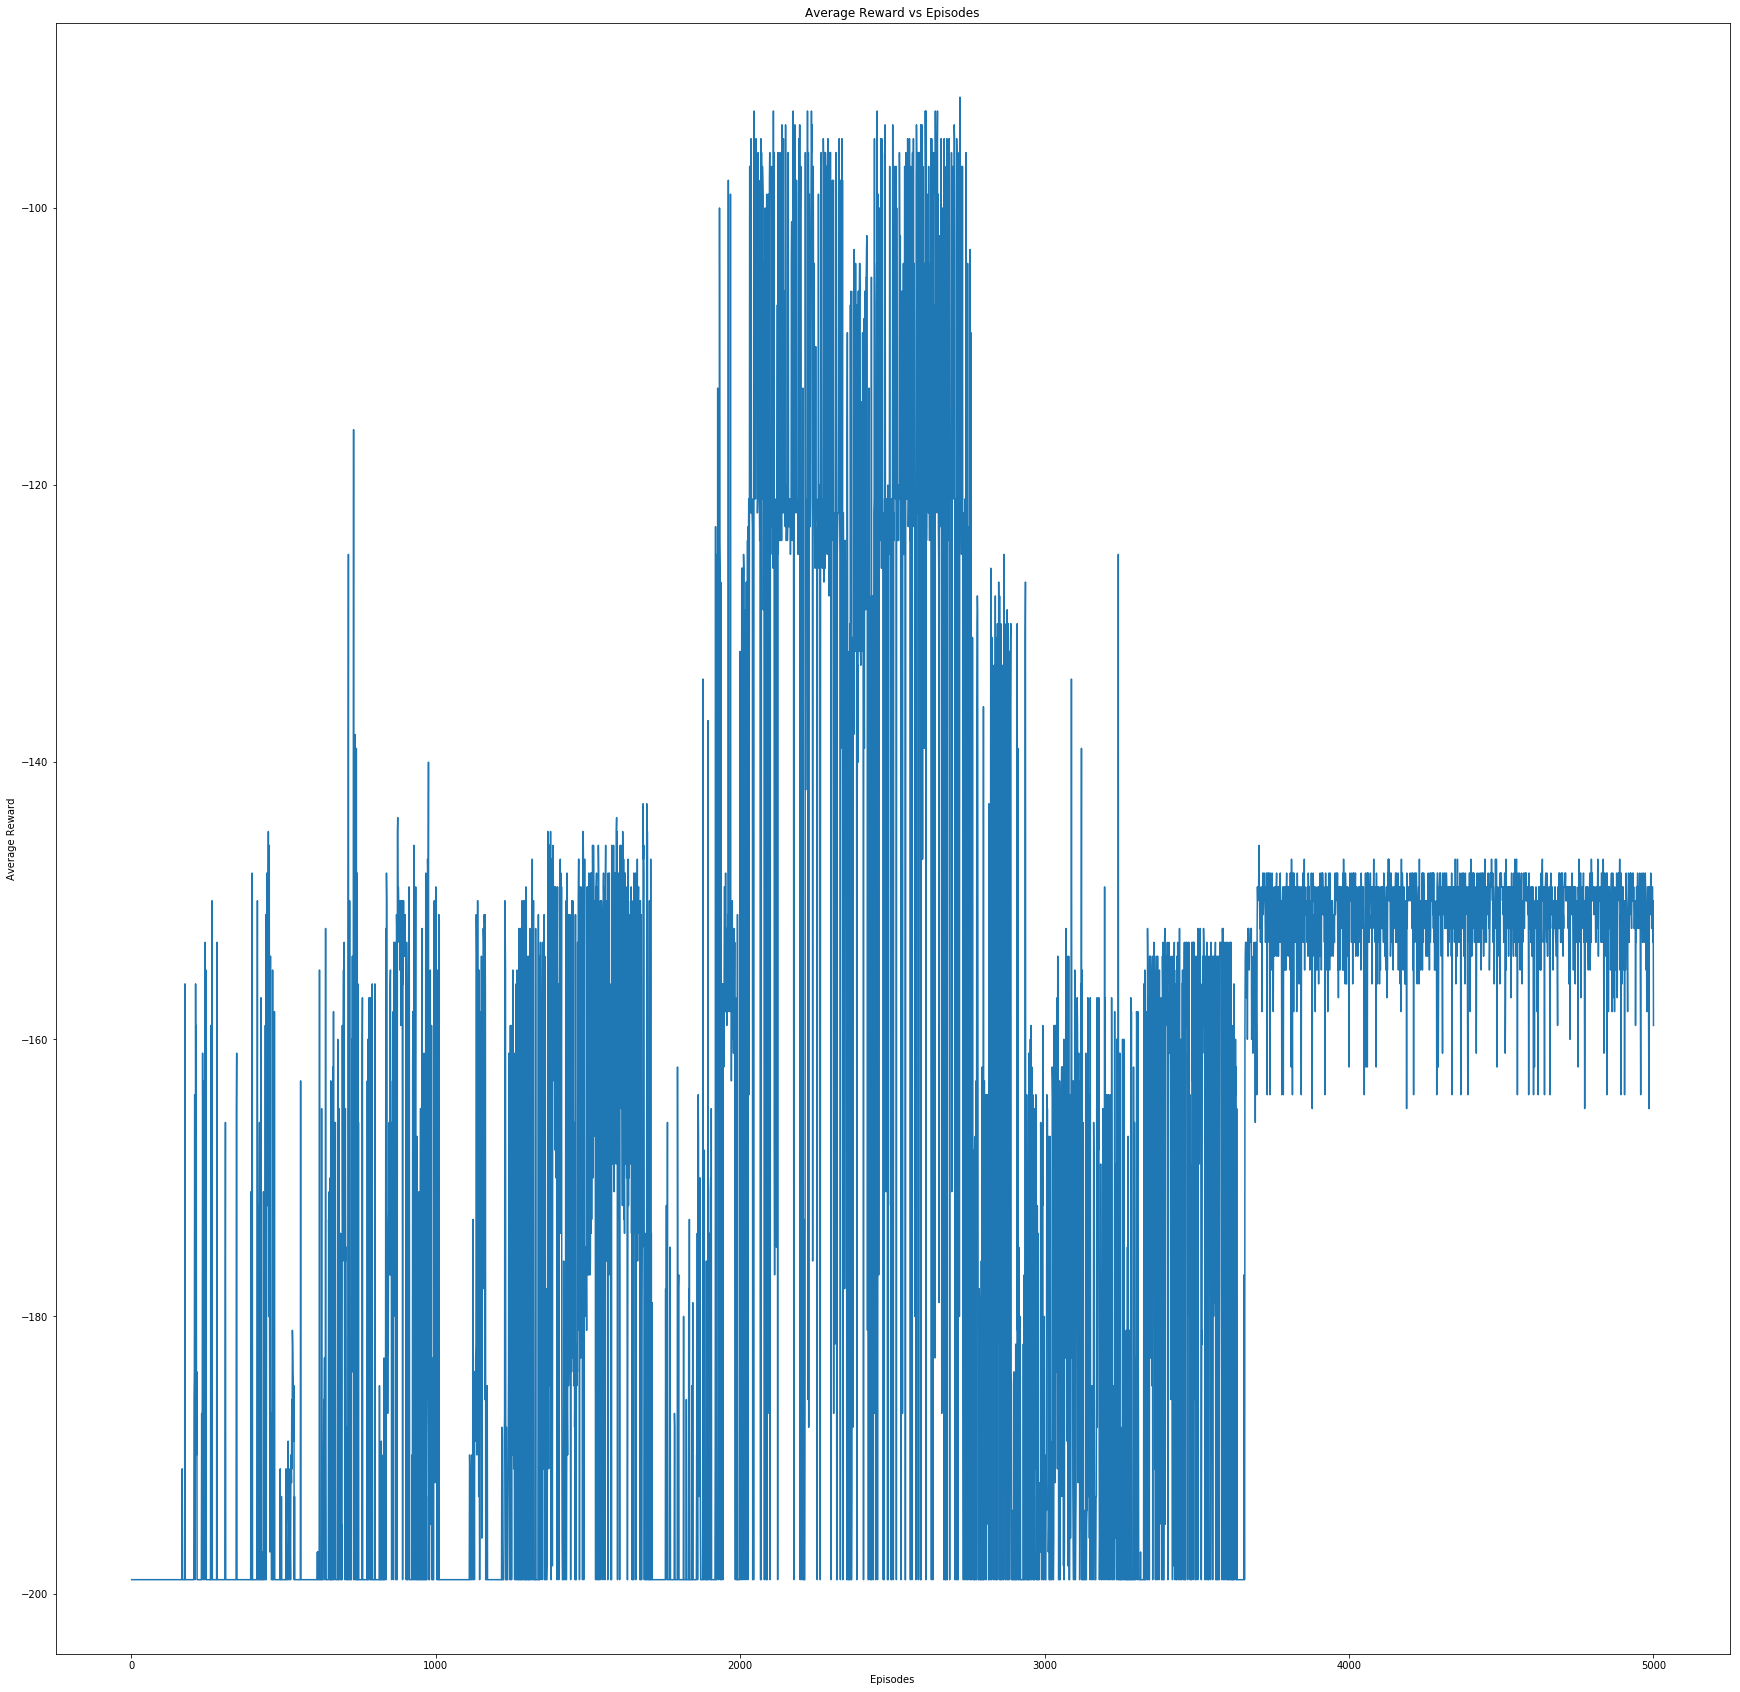

In [4]:
learning, discount = 0.4, 0.99
ql = QLearner(learning, discount, explore_function="random")
rewards = ql.q_learning(epsilon, min_eps, episodes)
plt.figure(figsize=(30, 30))
plt.plot((np.arange(len(rewards)) + 1), rewards)
plt.xlabel('Episodes')
plt.ylabel('Average Reward')
plt.title('Average Reward vs Episodes')
plt.show()
random_final_alphas.append(sum(rewards[-10:])/10)

## $\alpha$ = 0.9

100%|██████████| 5000/5000 [00:58<00:00, 85.05it/s] 


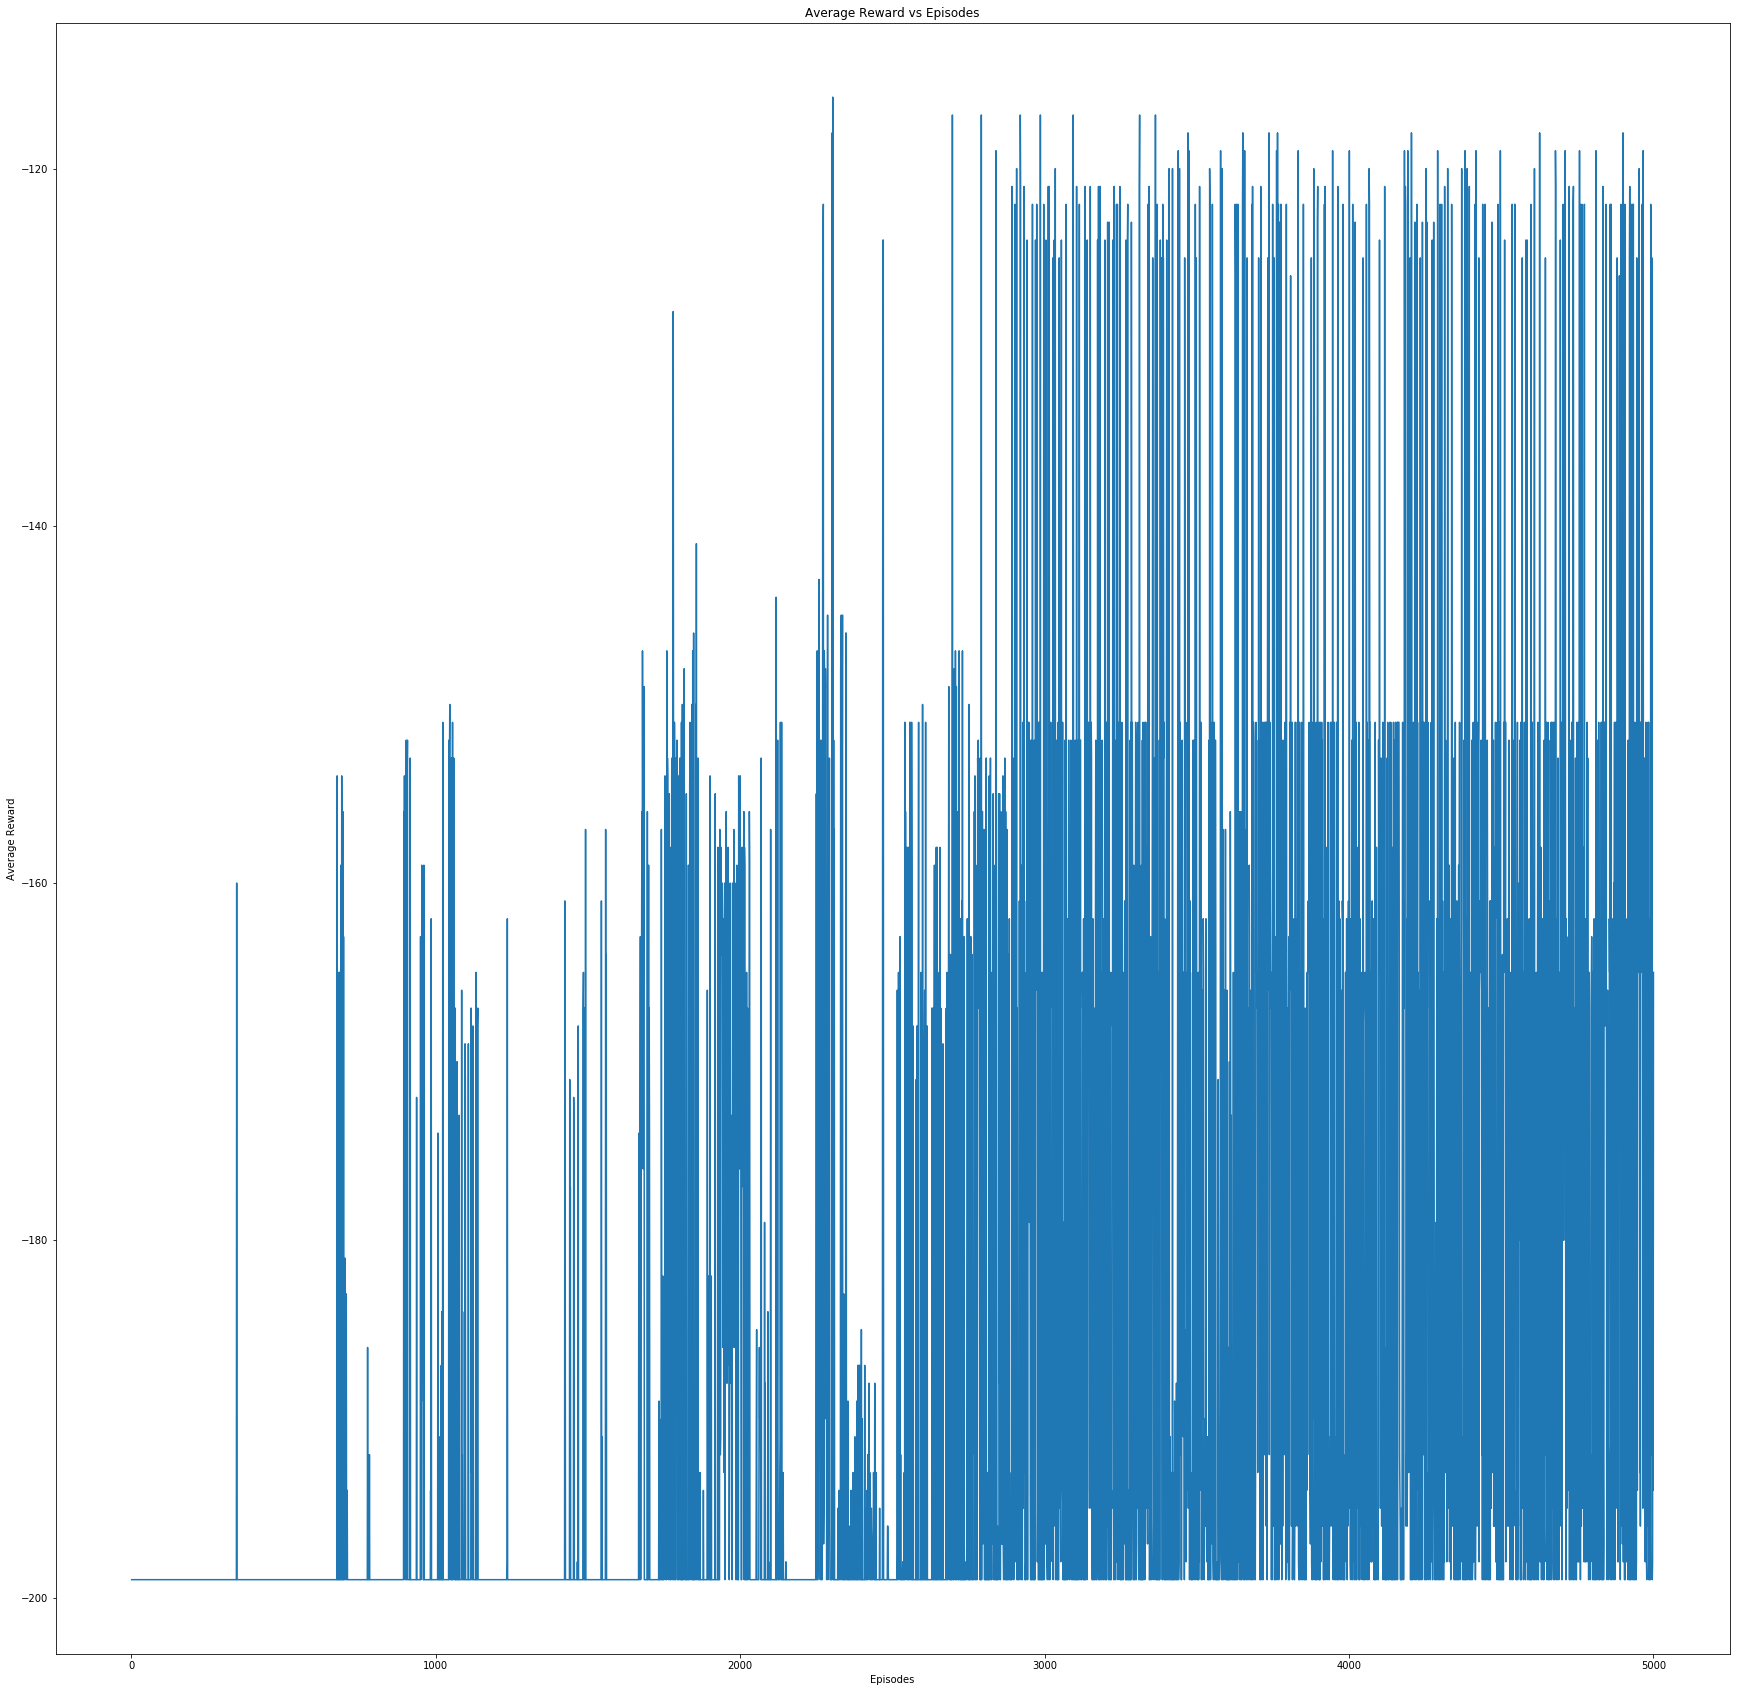

In [5]:
learning, discount = 0.9, 0.99
ql = QLearner(learning, discount, explore_function="random")
rewards = ql.q_learning(epsilon, min_eps, episodes)
plt.figure(figsize=(30, 30))
plt.plot((np.arange(len(rewards)) + 1), rewards)
plt.xlabel('Episodes')
plt.ylabel('Average Reward')
plt.title('Average Reward vs Episodes')
plt.show()
random_final_alphas.append(sum(rewards[-10:])/10)

<div dir="rtl">
چون تابع اکتشاف تصادفی و نا بهینه است، با زیاد شدن نرخ یادگیری مدل گام های تصادفی برداشته و شانس پیدا کردن جواب که در حالات خیلی کمی رخ می دهد را به احتمال بیشتر پیدا می کند. اما به دنبال بهبود حالات یافت شده کمتر می رود. 
    
    
</div>

## Compare alphas

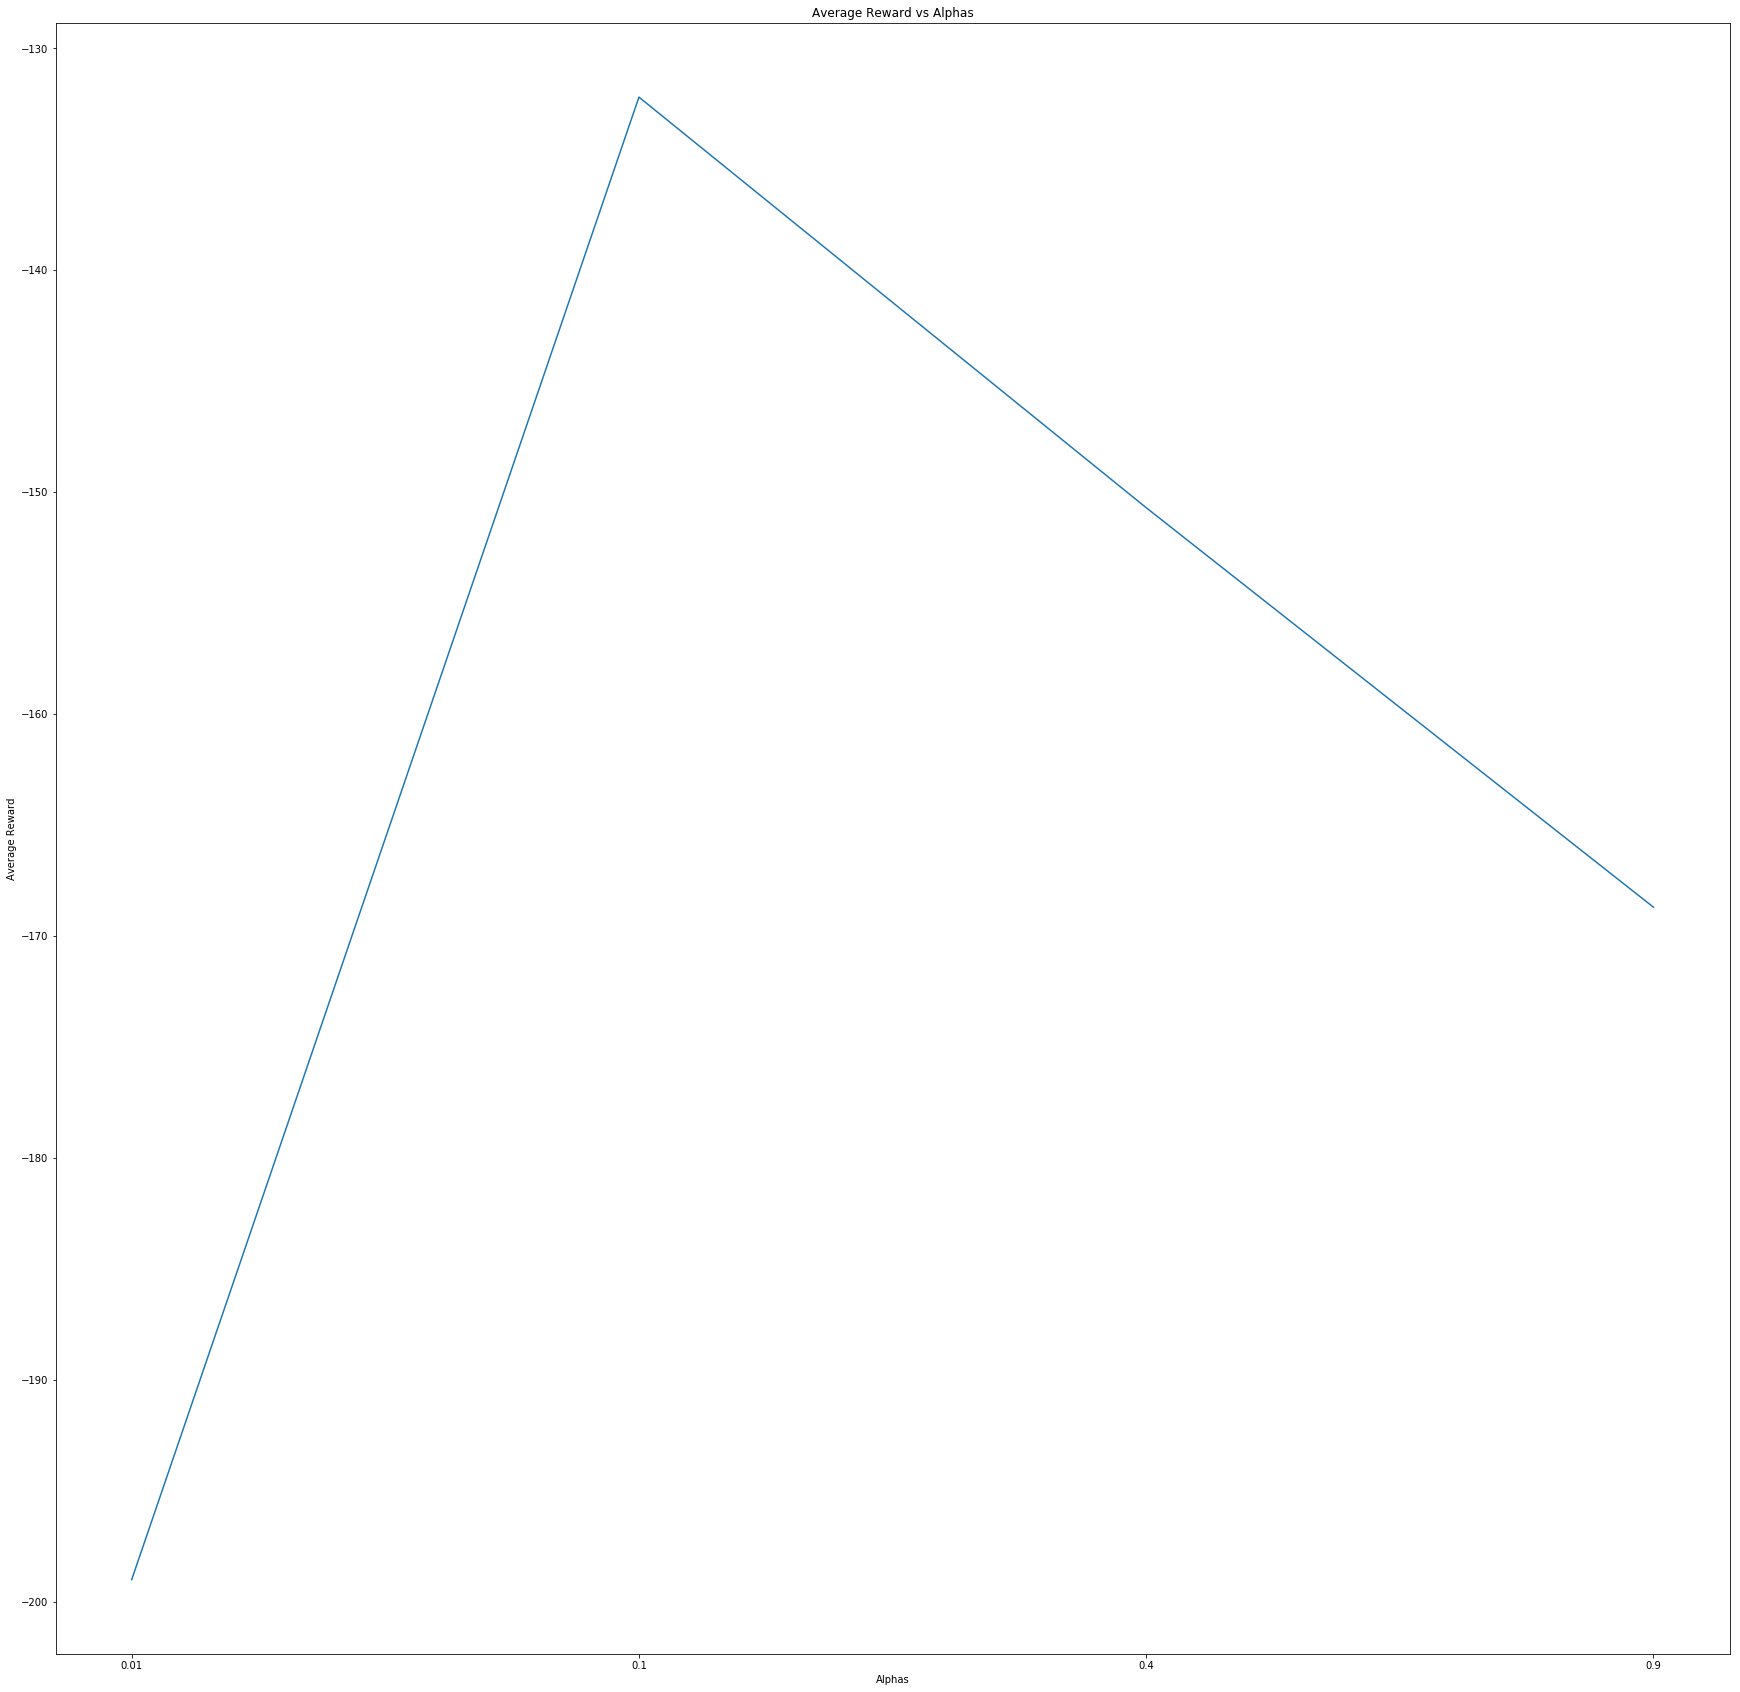

In [6]:
plt.figure(figsize=(30, 30))
plt.plot(["0.01", "0.1", "0.4", "0.9"], random_final_alphas)
plt.xlabel('Alphas')
plt.ylabel('Average Reward')
plt.title('Average Reward vs Alphas')
plt.show()

<div dir="rtl">
یادگیری مناسب وقتی است که نه زیاد به دنبال یادگیری جدید باشد و نه بایاس به دانش قبلی
    
    
</div>

# Exploration function: $f(s) = U(s) + \dfrac{1}{N(s)}$

## $\alpha$ = 0.01

100%|██████████| 5000/5000 [01:19<00:00, 63.26it/s] 


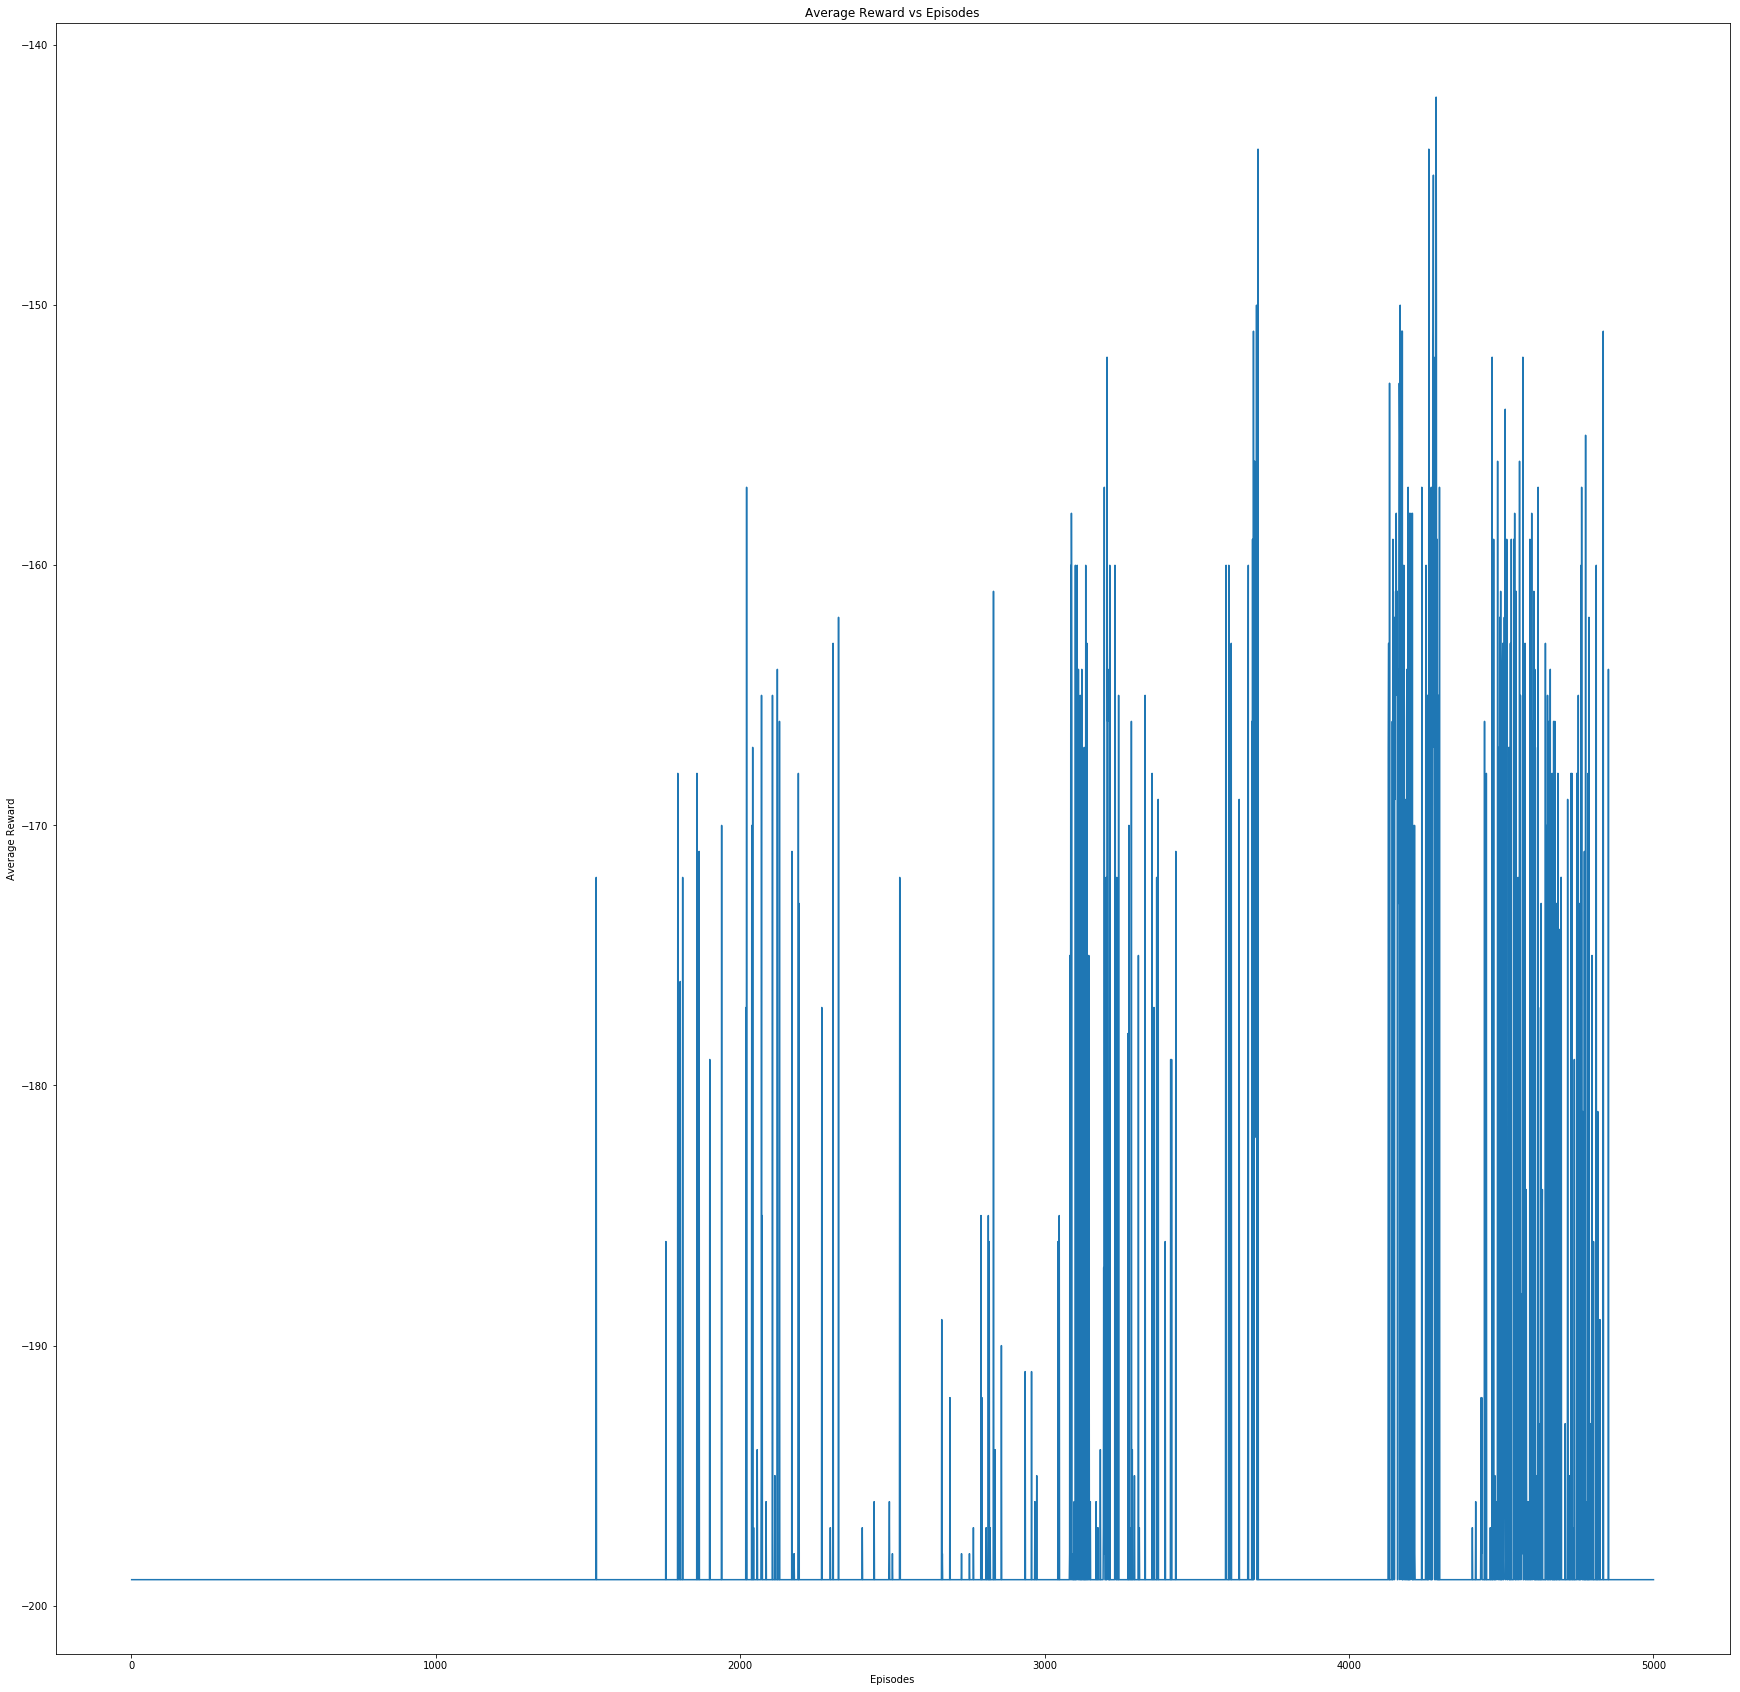

In [7]:
learning, discount = 0.01, 0.99
ql = QLearner(learning, discount, explore_function="notrandom")
rewards = ql.q_learning(epsilon, min_eps, episodes)
plt.figure(figsize=(30, 30))
plt.plot((np.arange(len(rewards)) + 1), rewards)
plt.xlabel('Episodes')
plt.ylabel('Average Reward')
plt.title('Average Reward vs Episodes')
plt.show()
nonrandom_final_alphas.append(sum(rewards[-10:])/10)

## $\alpha$ = 0.1

100%|██████████| 5000/5000 [01:13<00:00, 68.09it/s] 


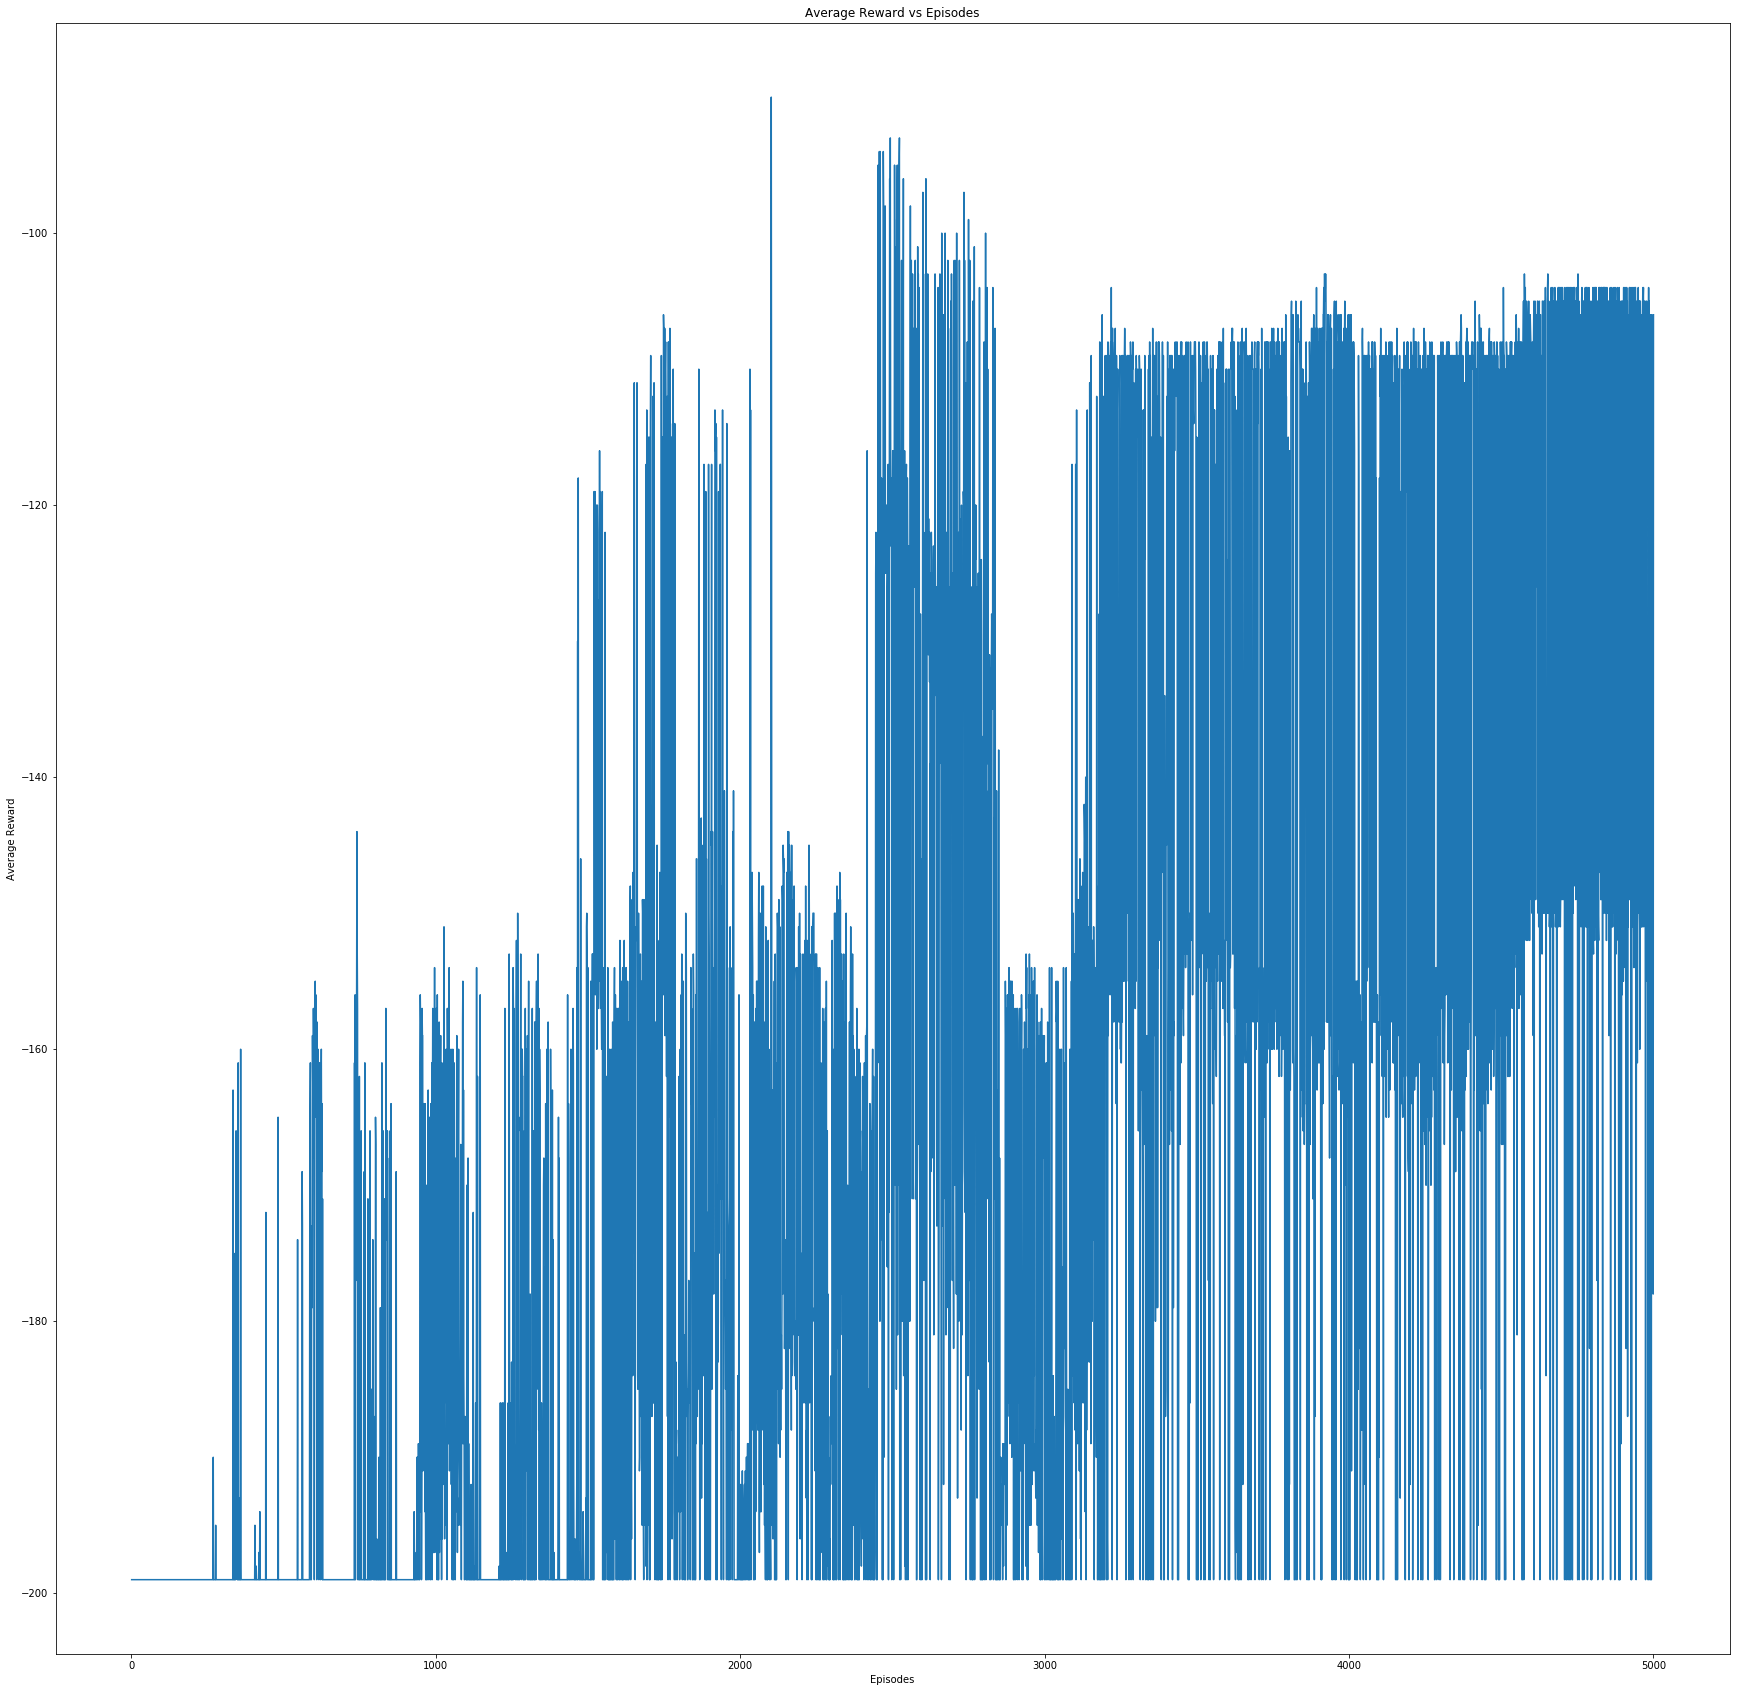

In [8]:
learning, discount = 0.1, 0.99
ql = QLearner(learning, discount, explore_function="notrandom")
rewards = ql.q_learning(epsilon, min_eps, episodes)
plt.figure(figsize=(30, 30))
plt.plot((np.arange(len(rewards)) + 1), rewards)
plt.xlabel('Episodes')
plt.ylabel('Average Reward')
plt.title('Average Reward vs Episodes')
plt.show()
nonrandom_final_alphas.append(sum(rewards[-10:])/10)

## $\alpha$ = 0.4

100%|██████████| 5000/5000 [01:45<00:00, 47.36it/s] 


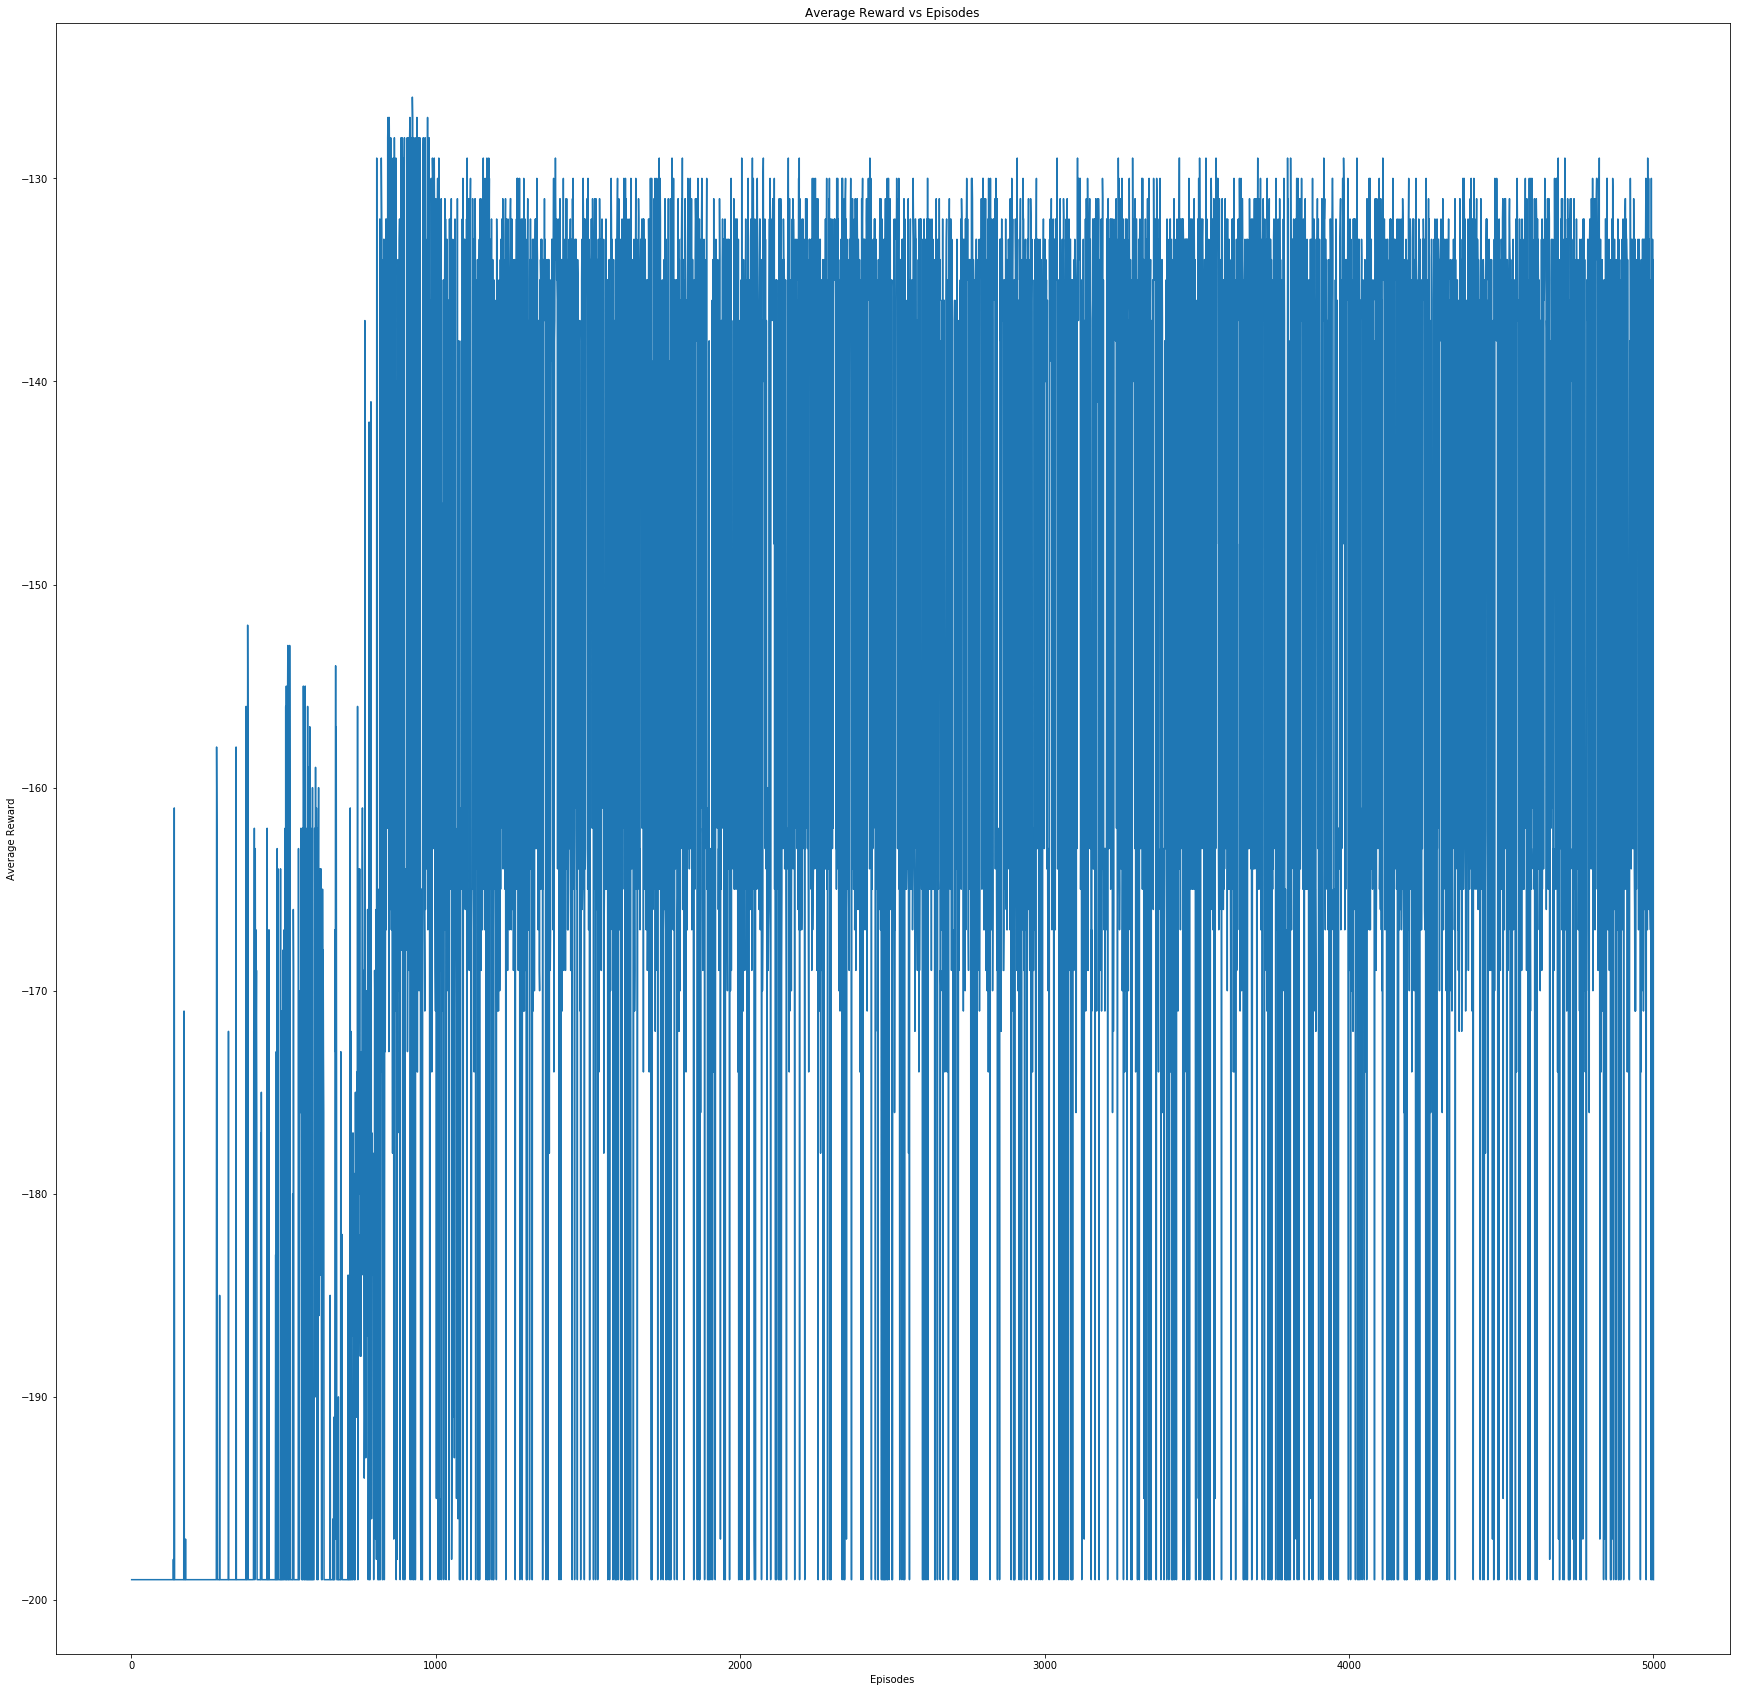

In [9]:
learning, discount = 0.4, 0.99
ql = QLearner(learning, discount, explore_function="notrandom")
rewards = ql.q_learning(epsilon, min_eps, episodes)
plt.figure(figsize=(30, 30))
plt.plot((np.arange(len(rewards)) + 1), rewards)
plt.xlabel('Episodes')
plt.ylabel('Average Reward')
plt.title('Average Reward vs Episodes')
plt.show()
nonrandom_final_alphas.append(sum(rewards[-10:])/10)

## $\alpha$ = 0.9

100%|██████████| 5000/5000 [01:11<00:00, 69.67it/s] 


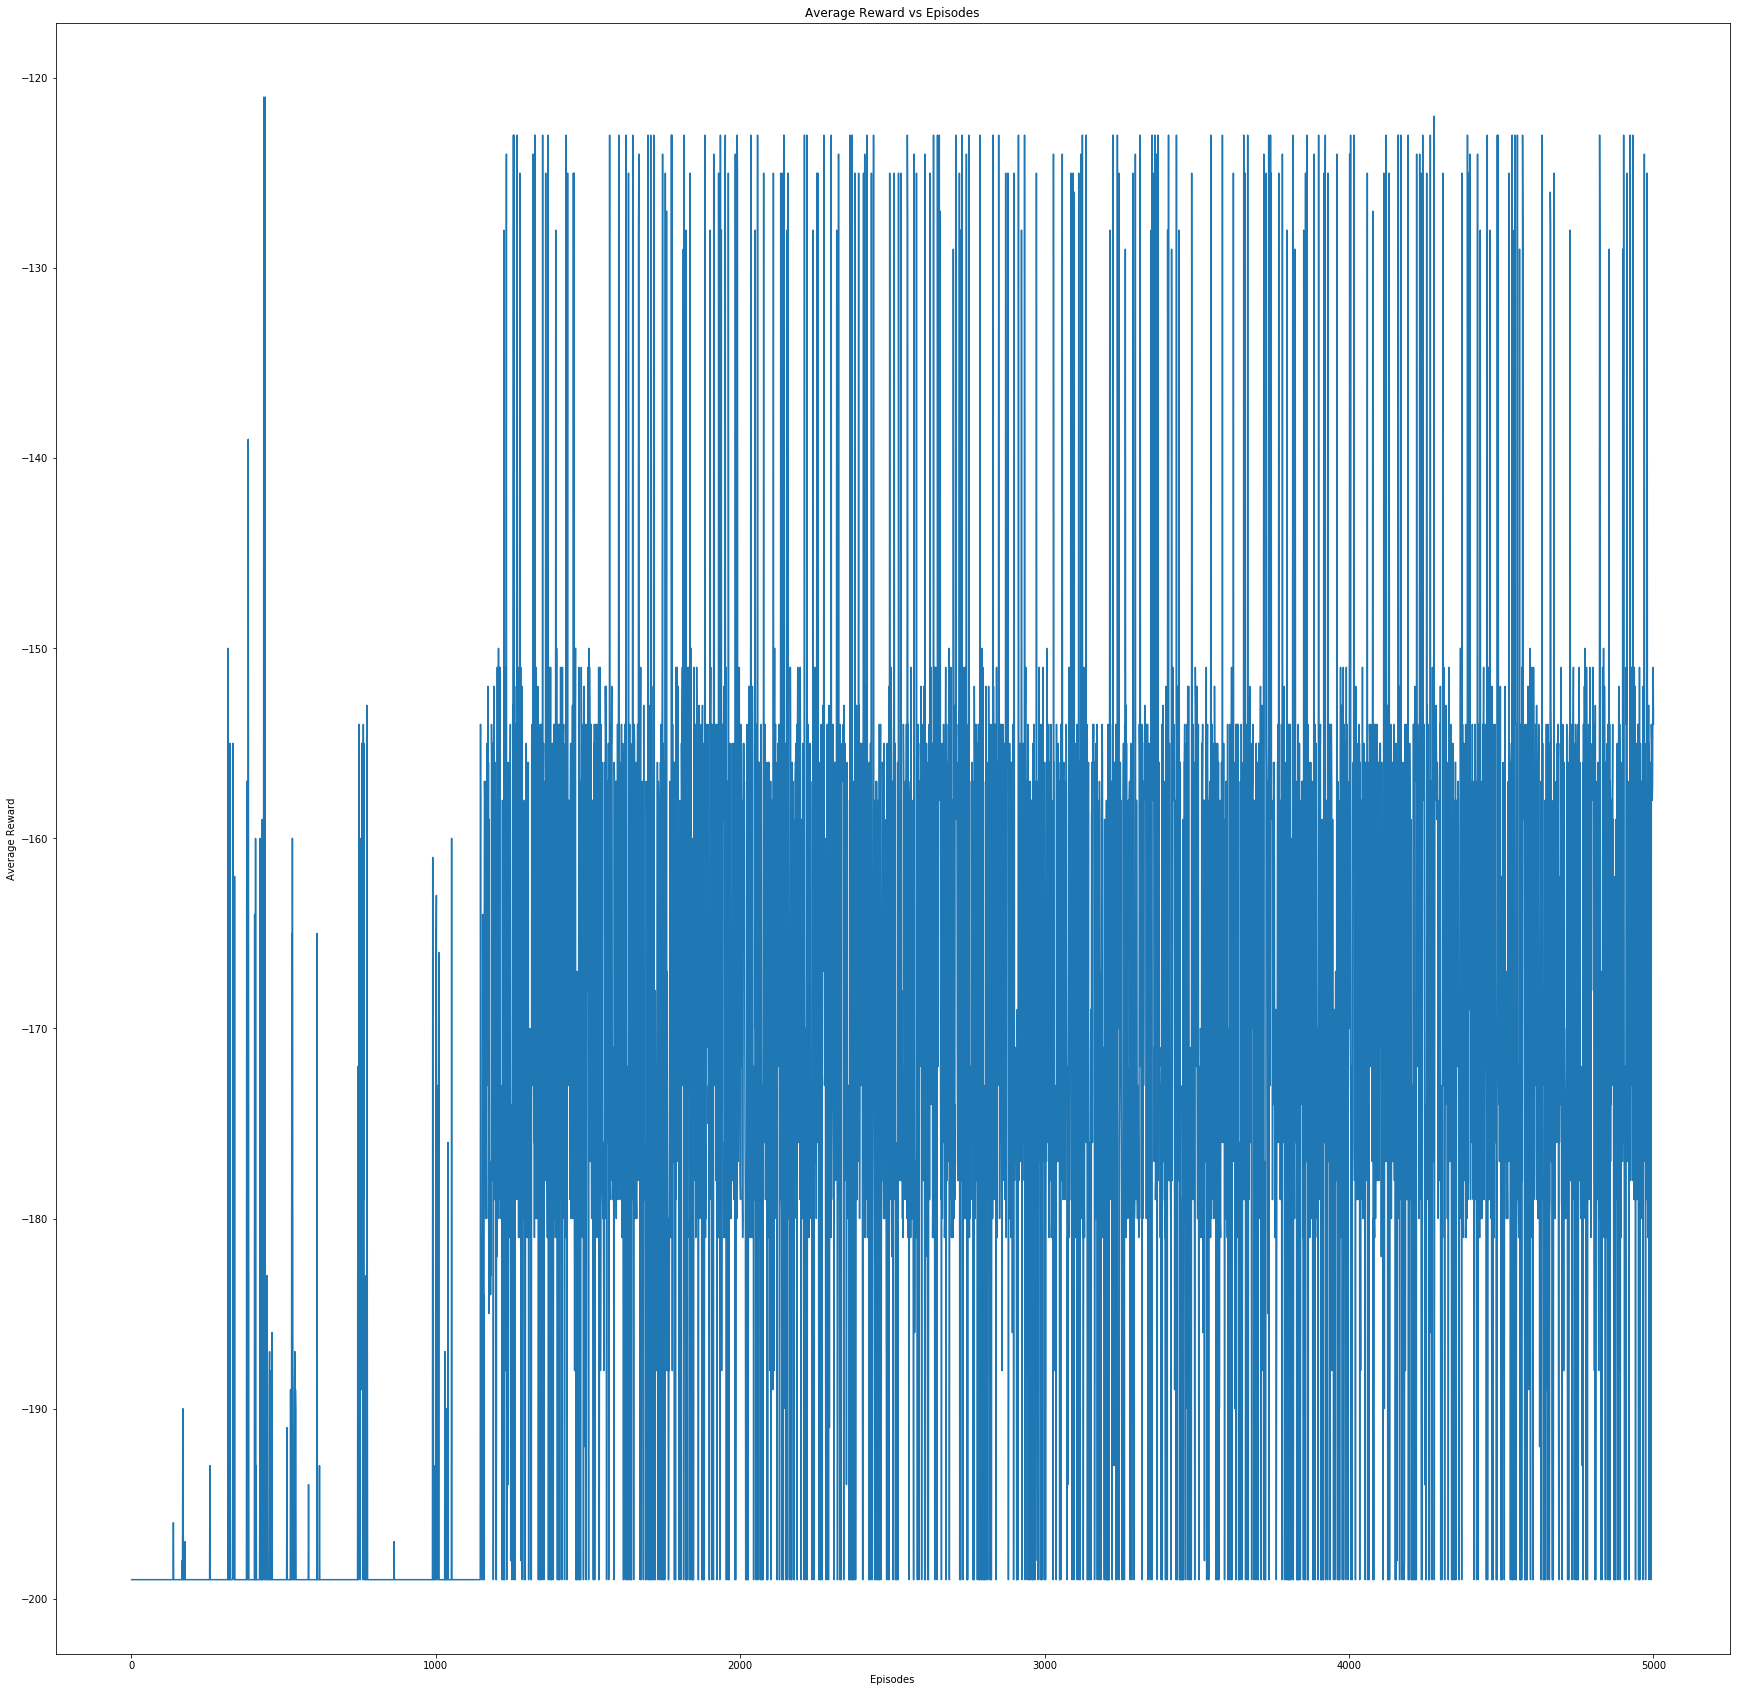

In [11]:
learning, discount = 0.9, 0.99
ql = QLearner(learning, discount, explore_function="notrandom")
rewards = ql.q_learning(epsilon, min_eps, episodes)
plt.figure(figsize=(30, 30))
plt.plot((np.arange(len(rewards)) + 1), rewards)
plt.xlabel('Episodes')
plt.ylabel('Average Reward')
plt.title('Average Reward vs Episodes')
plt.show()
nonrandom_final_alphas.append(sum(rewards[-10:])/10)

<div dir="rtl">
در اینجا نیز یادگیری وقتی بهینه است که مقدار کمی به کشف روش های جدید بپردازیم و مقدار خوبی هم دانش قبلی را بهبود بدهیم    
</div>

## compare alhpas

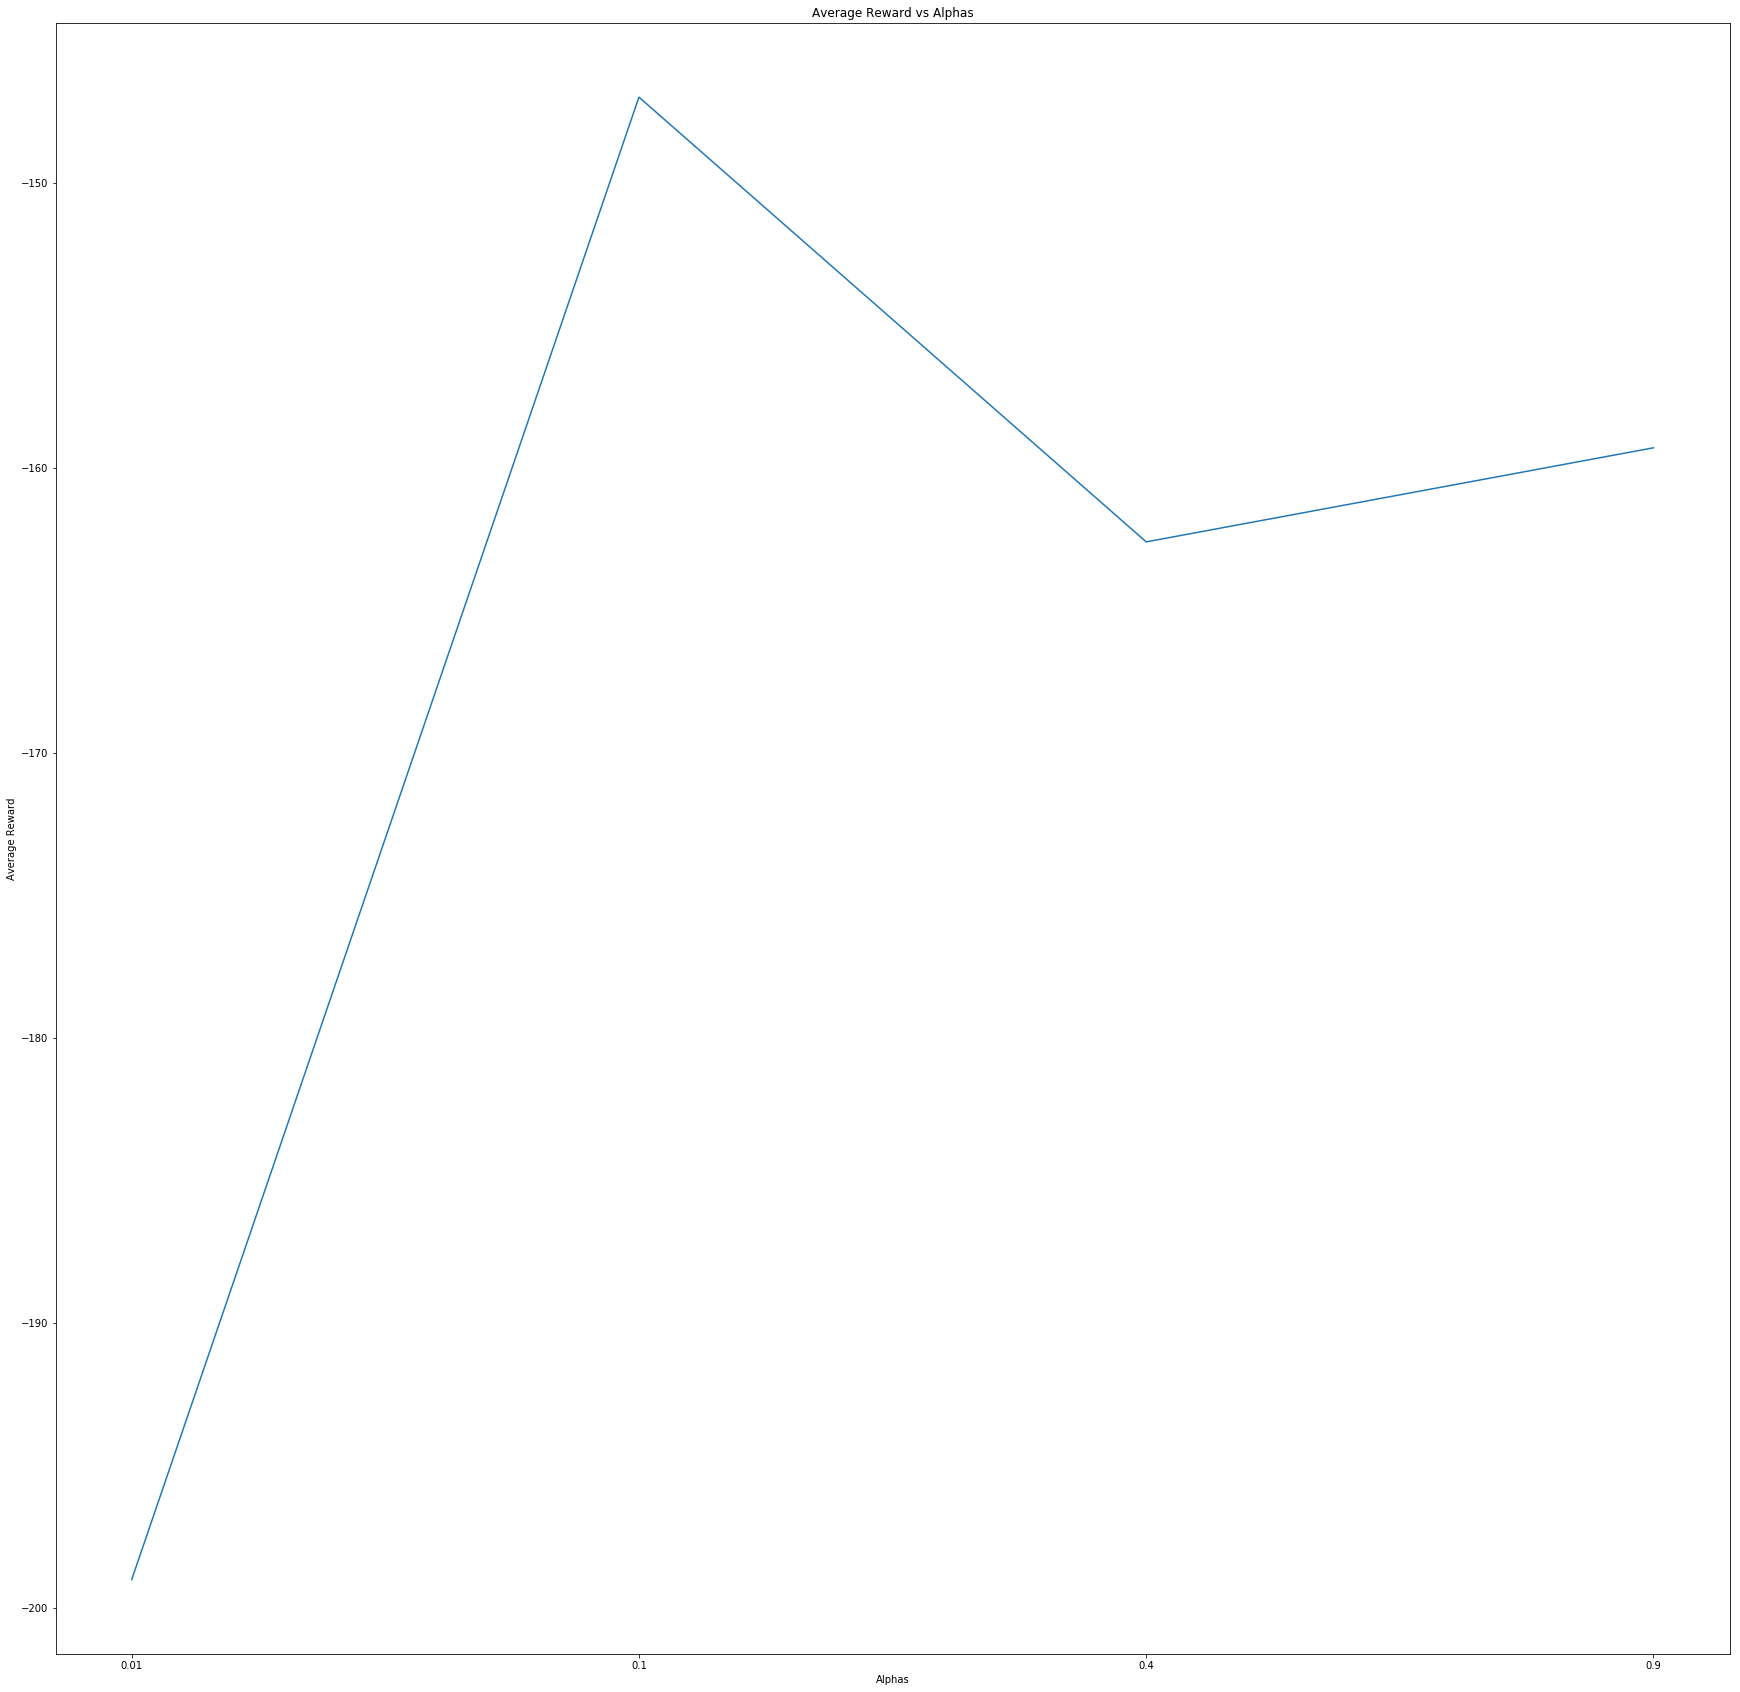

In [12]:
plt.figure(figsize=(30, 30))
plt.plot(["0.01", "0.1", "0.4", "0.9"], nonrandom_final_alphas)
plt.xlabel('Alphas')
plt.ylabel('Average Reward')
plt.title('Average Reward vs Alphas')
plt.show()

# Compare explore functions

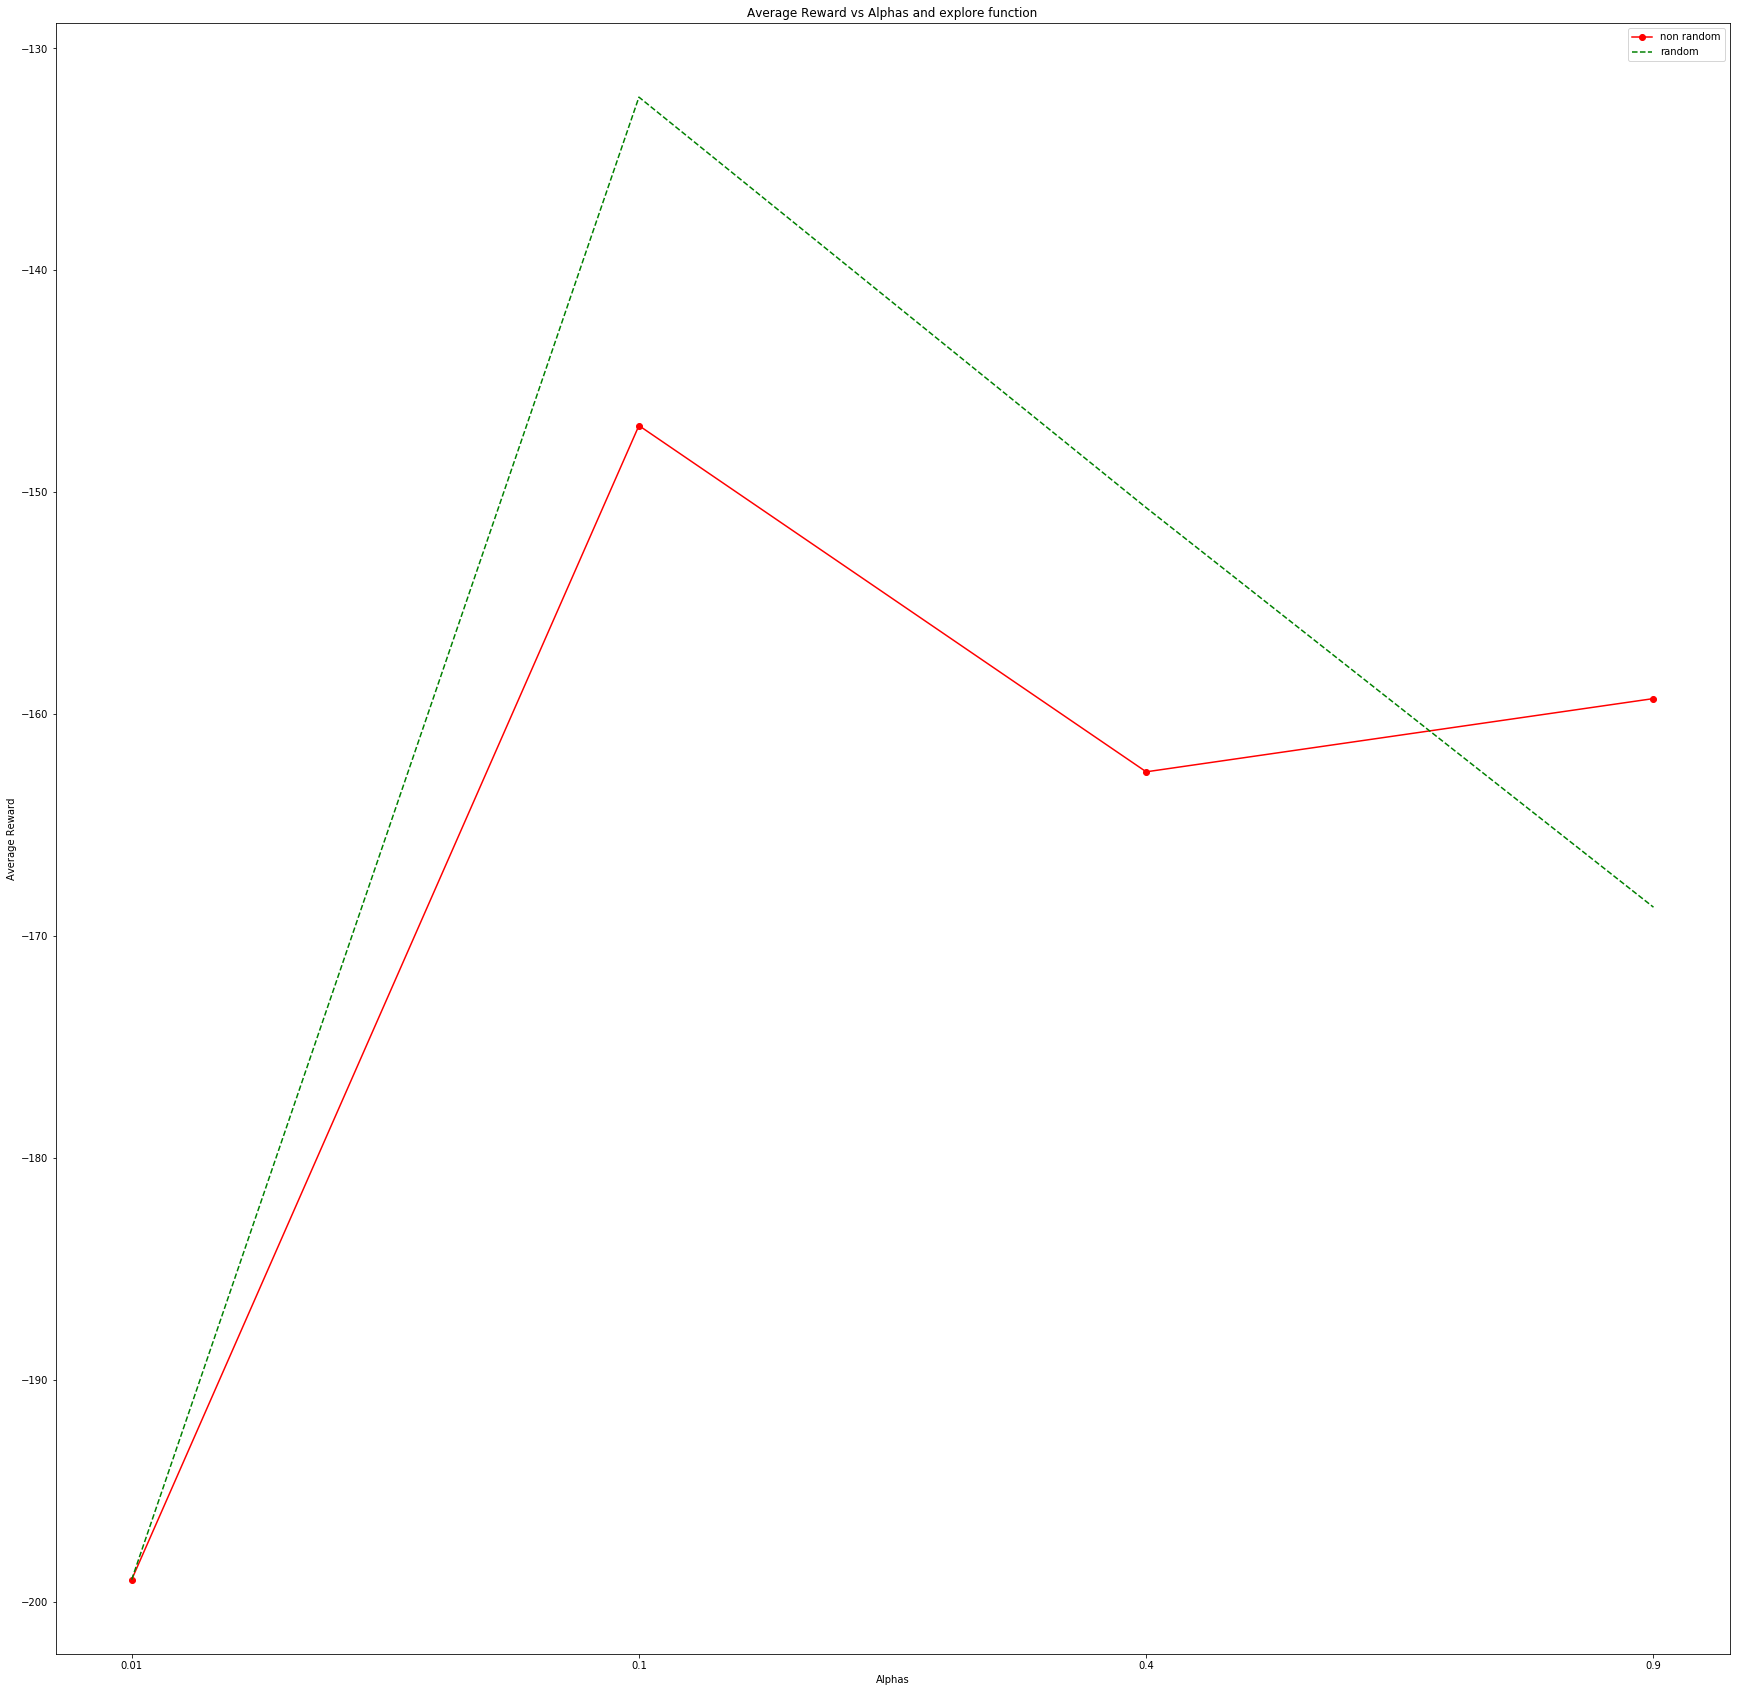

In [13]:
plt.figure(figsize=(30, 30))
plt.plot(["0.01", "0.1", "0.4", "0.9"], nonrandom_final_alphas, 'r-o', label='non random')
plt.plot(["0.01", "0.1", "0.4", "0.9"], random_final_alphas, 'g--', label='random')
plt.xlabel('Alphas')
plt.ylabel('Average Reward')
plt.title('Average Reward vs Alphas and explore function')
plt.legend()
plt.show()


<div dir="rtl">
با وجود استفاده از تابع کشف غیر تصادفی، چون تابع هیوریستیک خوبی برای پیدا کردن جواب نداریم، حالت تصادفی همچنان خوب عمل می کند و سریع تر یک جواب ممکن به ما می دهد    
    
</div>